In [1]:
import pandas as pd
import evds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from evds import evdsAPI
import pandas as pd
import numpy as np
import requests
import json
from urllib.parse import urlencode
warnings.filterwarnings("ignore")

In [2]:
buyume=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
buyume=buyume.iloc[:34,[1,19,20,21,22]].T
buyume=buyume.iloc[:,8:]
veri=[]
for i in range(len(buyume.columns)):
   veri.append(buyume.iloc[:,i].values[1:])

In [3]:
veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1999-03-31",freq="Q",periods=len(veri)))
veri

,Büyüme
1999-03-31,-1.68582
1999-06-30,-0.563716
1999-09-30,-1.686618
1999-12-31,2.98742
2000-03-31,1.574851
...,...
2023-09-30,0.239144
2023-12-31,1.166981
2024-03-31,1.172372
2024-06-30,-0.214586


In [4]:
with open("C:/Users/Bora/Desktop/api.txt") as api:
    key=api.read()

In [5]:
params = {
    'series': "TP.DK.USD.S.YTL",
    'startDate': "01-01-2006",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

usd = formatted_response['items']
usd = pd.DataFrame(usd)


usd = usd.drop(columns=['UNIXTIME','Tarih'])
usd.columns = ['USD/TL']
usd['USD/TL'] = pd.to_numeric(usd['USD/TL'])
usd=usd.set_index(pd.date_range(start="2006-01-31",freq="Q",periods=len(usd)))
usd=usd.pct_change()*100
usd=usd.dropna()
usd

,USD/TL
2006-06-30,9.336700
2006-09-30,3.109109
2006-12-31,-2.951977
2007-03-31,-3.182185
2007-06-30,-5.023656
...,...
2024-03-31,8.448607
2024-06-30,4.643019
2024-09-30,3.555937
2024-12-31,3.098104


In [6]:
params = {
    'series': "TP.KREDI.L001",
    'startDate': "31-12-2007",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 5,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kredi = formatted_response['items']
kredi = pd.DataFrame(kredi)


kredi = kredi.drop(columns=['UNIXTIME','Tarih'])
kredi.columns = ['Kredi']
kredi['Kredi'] = pd.to_numeric(kredi['Kredi'])
kredi=kredi.dropna()
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="M",periods=len(kredi)))
kredi=kredi.resample("Q").last()
kredi=kredi.pct_change()*100
kredi=kredi.set_index(pd.date_range(start="31-12-2007",freq="Q",periods=len(kredi)))
kredi=kredi.dropna()
kredi

,Kredi
2008-03-31,8.415812
2008-06-30,8.611317
2008-09-30,6.465078
2008-12-31,0.301982
2009-03-31,-1.910862
...,...
2024-03-31,10.994405
2024-06-30,8.314733
2024-09-30,7.989453
2024-12-31,6.786281


In [7]:
params = {
    'series': "TP.KKHARTUT.KT1",
    'startDate': "31-03-2014",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

kart = formatted_response['items']
kart = pd.DataFrame(kart)


kart = kart.drop(columns=['UNIXTIME','Tarih'])
kart.columns = ['Kart']
kart['Kart'] = pd.to_numeric(kart['Kart'])
kart=kart.set_index(pd.date_range(start="31-03-2014",freq="Q",periods=len(kart)))
kart=kart.pct_change()*100
kart=kart.dropna()
kart

,Kart
2014-06-30,6.763788
2014-09-30,4.445903
2014-12-31,0.341941
2015-03-31,2.981396
2015-06-30,10.861409
2015-09-30,2.101863
2015-12-31,-0.955240
2016-03-31,0.426535
2016-06-30,7.905282
2016-09-30,1.055159


In [8]:
params = {
    'series': "TP.CLI2.A01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

öncü = formatted_response['items']
öncü = pd.DataFrame(öncü)


öncü = öncü.drop(columns=['UNIXTIME','Tarih'])
öncü.columns = ['Öncü Gösterge']
öncü['Öncü Gösterge'] = pd.to_numeric(öncü['Öncü Gösterge'])
öncü=öncü.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(öncü)))
öncü=öncü.pct_change()*100
öncü=öncü.dropna()
öncü

,Öncü Gösterge
1999-06-30,1.970531
1999-09-30,-0.087573
1999-12-31,2.500950
2000-03-31,3.514523
2000-06-30,-0.167970
...,...
2023-12-31,-0.320000
2024-03-31,0.863090
2024-06-30,0.531337
2024-09-30,0.926439


In [9]:
params = {
    'series': "TP.IHRACATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ihracat = formatted_response['items']
ihracat = pd.DataFrame(ihracat)


ihracat = ihracat.drop(columns=['UNIXTIME','Tarih'])
ihracat.columns = ['İhracat']
ihracat['İhracat'] = pd.to_numeric(ihracat['İhracat'])
ihracat=ihracat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ihracat)))
ihracat=ihracat.pct_change()*100
ihracat=ihracat.dropna()
ihracat

,İhracat
2013-06-30,2.938221
2013-09-30,-2.843534
2013-12-31,6.008618
2014-03-31,0.797169
2014-06-30,0.069491
2014-09-30,-4.059849
2014-12-31,2.623426
2015-03-31,-6.256287
2015-06-30,-2.065737
2015-09-30,-7.425967


In [10]:
params = {
    'series': "TP.ITHALATBEC.9999",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

ithalat = formatted_response['items']
ithalat = pd.DataFrame(ithalat)


ithalat = ithalat.drop(columns=['UNIXTIME','Tarih'])
ithalat.columns = ['İthalat']
ithalat['İthalat'] = pd.to_numeric(ithalat['İthalat'])
ithalat=ithalat.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(ithalat)))
ithalat=ithalat.pct_change()*100
ithalat=ithalat.dropna()
ithalat

,İthalat
2013-06-30,13.045979
2013-09-30,-6.944537
2013-12-31,2.390350
2014-03-31,-8.643594
2014-06-30,6.982644
2014-09-30,-3.016522
2014-12-31,2.233891
2015-03-31,-14.936426
2015-06-30,2.664102
2015-09-30,-8.070364


In [11]:
params = {
    'series': "TP.KTF17",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})

# print(response.request.headers)

formatted_response = json.loads(response.content)

tfaiz = formatted_response['items']
tfaiz = pd.DataFrame(tfaiz)


tfaiz = tfaiz.drop(columns=['UNIXTIME','Tarih'])
tfaiz.columns = ['Ticari Faiz']
tfaiz['Ticari Faiz'] = pd.to_numeric(tfaiz['Ticari Faiz'])
tfaiz=tfaiz.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tfaiz)))
tfaiz=tfaiz.dropna()
tfaiz

,Ticari Faiz
2002-03-31,58.993077
2002-06-30,49.074615
2002-09-30,45.385385
2002-12-31,43.189231
2003-03-31,44.611538
...,...
2024-03-31,56.011538
2024-06-30,64.856923
2024-09-30,60.701538
2024-12-31,59.899231


In [12]:

params = {
    'series': "TP.TRY.MT01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz1ay = formatted_response['items']
mfaiz1ay = pd.DataFrame(mfaiz1ay)


mfaiz1ay = mfaiz1ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz1ay.columns = ['Mevduat Faiz 1Ay']
mfaiz1ay['Mevduat Faiz 1Ay'] = pd.to_numeric(mfaiz1ay['Mevduat Faiz 1Ay'])
mfaiz1ay=mfaiz1ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz1ay)))
mfaiz1ay=mfaiz1ay.dropna()
mfaiz1ay

,Mevduat Faiz 1Ay
2002-03-31,61.068462
2002-06-30,51.750769
2002-09-30,50.345385
2002-12-31,48.413077
2003-03-31,47.924615
...,...
2024-03-31,45.396154
2024-06-30,55.676923
2024-09-30,54.311538
2024-12-31,54.683077


In [13]:

params = {
    'series': "TP.TRY.MT02",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

mfaiz3ay = formatted_response['items']
mfaiz3ay = pd.DataFrame(mfaiz3ay)


mfaiz3ay = mfaiz3ay.drop(columns=['UNIXTIME','Tarih'])
mfaiz3ay.columns = ['Mevduat Faiz 3Ay']
mfaiz3ay['Mevduat Faiz 3Ay'] = pd.to_numeric(mfaiz3ay['Mevduat Faiz 3Ay'])
mfaiz3ay=mfaiz3ay.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(mfaiz3ay)))
mfaiz3ay=mfaiz3ay.dropna()
mfaiz3ay

,Mevduat Faiz 3Ay
2002-03-31,59.005385
2002-06-30,50.468462
2002-09-30,50.828462
2002-12-31,48.276923
2003-03-31,47.048462
...,...
2024-03-31,53.394615
2024-06-30,63.980000
2024-09-30,59.335385
2024-12-31,59.283846


In [14]:

params = {
    'series': "TP.TSANAYMT2021.Y1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

sanayi = formatted_response['items']
sanayi = pd.DataFrame(sanayi)


sanayi = sanayi.drop(columns=['UNIXTIME','Tarih'])
sanayi.columns = ['Sanayi']
sanayi['Sanayi'] = pd.to_numeric(sanayi['Sanayi'])
sanayi=sanayi.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(sanayi)))
sanayi=sanayi.pct_change()*100
sanayi=sanayi.dropna()
sanayi

,Sanayi
2005-06-30,-0.616297
2005-09-30,3.830180
2005-12-31,2.898139
2006-03-31,1.522466
2006-06-30,1.885331
...,...
2023-12-31,-1.308455
2024-03-31,3.032964
2024-06-30,-4.045027
2024-09-30,-1.257911


In [15]:

params = {
    'series': "TP.PR.ARZ13",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m2 = formatted_response['items']
m2 = pd.DataFrame(m2)


m2 = m2.drop(columns=['UNIXTIME','Tarih'])
m2.columns = ['M2']
m2['M2'] = pd.to_numeric(m2['M2'])
m2=m2.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m2)))
m2=m2.pct_change()*100
m2=m2.dropna()
m2

,M2
2006-03-31,1.554679
2006-06-30,9.638037
2006-09-30,3.877008
2006-12-31,4.679794
2007-03-31,5.001742
...,...
2024-03-31,7.259381
2024-06-30,6.092967
2024-09-30,7.933976
2024-12-31,5.786708


In [16]:

params = {
    'series': "TP.PR.ARZ22",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

m3 = formatted_response['items']
m3 = pd.DataFrame(m3)


m3 = m3.drop(columns=['UNIXTIME','Tarih'])
m3.columns = ['M3']
m3['M3'] = pd.to_numeric(m3['M3'])
m3=m3.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(m3)))
m3=m3.pct_change()*100
m3=m3.dropna()
m3

,M3
2006-03-31,1.798053
2006-06-30,9.639824
2006-09-30,2.739330
2006-12-31,3.939840
2007-03-31,4.554048
...,...
2024-03-31,8.359733
2024-06-30,7.890625
2024-09-30,10.977930
2024-12-31,7.814873


In [17]:

params = {
    'series': "TP.FG.J0",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tüfe = formatted_response['items']
tüfe = pd.DataFrame(tüfe)


tüfe = tüfe.drop(columns=['UNIXTIME','Tarih'])
tüfe.columns = ['TÜFE']
tüfe['TÜFE'] = pd.to_numeric(tüfe['TÜFE'])
tüfe=tüfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tüfe)))
tüfe=tüfe.pct_change()*100
tüfe=tüfe.dropna()
tüfe

,TÜFE
2003-06-30,3.503735
2003-09-30,0.738513
2003-12-31,2.892589
2004-03-31,2.043974
2004-06-30,1.557564
...,...
2024-03-31,14.448411
2024-06-30,9.863378
2024-09-30,8.297692
2024-12-31,7.690816


In [18]:

params = {
    'series': "TP.TUFE1YI.T1",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

üfe = formatted_response['items']
üfe = pd.DataFrame(üfe)


üfe = üfe.drop(columns=['UNIXTIME','Tarih'])
üfe.columns = ['ÜFE']
üfe['ÜFE'] = pd.to_numeric(üfe['ÜFE'])
üfe=üfe.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(üfe)))
üfe=üfe.pct_change()*100
üfe=üfe.dropna()
üfe

,ÜFE
1999-06-30,12.224920
1999-09-30,10.767969
1999-12-31,15.393947
2000-03-31,16.175187
2000-06-30,7.151731
...,...
2024-03-31,9.732860
2024-06-30,9.025570
2024-09-30,5.170864
2024-12-31,3.362095


In [19]:

params = {
    'series': "TP.GY1.N2.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

reelgüven = formatted_response['items']
reelgüven = pd.DataFrame(reelgüven)


reelgüven = reelgüven.drop(columns=['UNIXTIME','Tarih'])
reelgüven.columns = ['Reel Güven']
reelgüven['Reel Güven'] = pd.to_numeric(reelgüven['Reel Güven'])
reelgüven=reelgüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(reelgüven)))
reelgüven=reelgüven.pct_change()*100
reelgüven=reelgüven.dropna()
reelgüven

,Reel Güven
2007-06-30,-3.372093
2007-09-30,0.992780
2007-12-31,-2.442657
2008-03-31,-2.992366
2008-06-30,-6.578533
...,...
2024-03-31,-1.343570
2024-06-30,-0.648508
2024-09-30,-3.426893
2024-12-31,4.190605


In [20]:

params = {
    'series': "TP.TG2.Y01",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

tuketicigüven = formatted_response['items']
tuketicigüven = pd.DataFrame(tuketicigüven)


tuketicigüven = tuketicigüven.drop(columns=['UNIXTIME','Tarih'])
tuketicigüven.columns = ['Tüketici Güven']
tuketicigüven['Tüketici Güven'] = pd.to_numeric(tuketicigüven['Tüketici Güven'])
tuketicigüven=tuketicigüven.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(tuketicigüven)))
tuketicigüven=tuketicigüven.pct_change()*100
tuketicigüven=tuketicigüven.dropna()
tuketicigüven

,Tüketici Güven
2012-06-30,-2.657194
2012-09-30,-0.096161
2012-12-31,-2.936119
2013-03-31,4.365104
2013-06-30,2.759161
2013-09-30,0.114167
2013-12-31,0.360455
2014-03-31,-3.903252
2014-06-30,4.686077
2014-09-30,-1.604023


In [21]:

params = {
    'series': "TP.KKO.MA",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

kko = formatted_response['items']
kko = pd.DataFrame(kko)


kko = kko.drop(columns=['UNIXTIME','Tarih'])
kko.columns = ['KKO']
kko['KKO'] = pd.to_numeric(kko['KKO'])
kko=kko.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(kko)))
kko=kko.pct_change()*100
kko=kko.dropna()
kko

,KKO
2007-06-30,1.882931
2007-09-30,-1.366010
2007-12-31,-0.407332
2008-03-31,-0.899796
2008-06-30,0.371440
...,...
2024-03-31,-0.431779
2024-06-30,-0.346921
2024-09-30,-1.000870
2024-12-31,-0.483516


In [22]:

params = {
    'series': "TP.TIG08",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

işsizlik = formatted_response['items']
işsizlik = pd.DataFrame(işsizlik)


işsizlik = işsizlik.drop(columns=['UNIXTIME','Tarih'])
işsizlik.columns = ['İşsizlik']
işsizlik['İşsizlik'] = pd.to_numeric(işsizlik['İşsizlik'])
işsizlik=işsizlik.set_index(pd.date_range(start="31-03-1999",freq="Q",periods=len(işsizlik)))
işsizlik=işsizlik.dropna()
işsizlik

,İşsizlik
2014-03-31,9.400000
2014-06-30,9.700000
2014-09-30,10.066667
2014-12-31,10.400000
2015-03-31,10.566667
2015-06-30,10.300000
2015-09-30,10.133333
2015-12-31,10.266667
2016-03-31,10.166667
2016-06-30,10.366667


In [23]:

params = {
    'series': "TP.IYAW2.S19.B",
    'startDate': "31-03-1999",
    'endDate': date.today().strftime("%d-%m-%Y"),
    'frequency': 6,
    'aggregationTypes': 'avg',
    'type': 'json'
}

url = f'https://evds2.tcmb.gov.tr/service/evds/{urlencode(params)}'

response = requests.get(url=url, headers={'key': key})



formatted_response = json.loads(response.content)

normalsiparis = formatted_response['items']
normalsiparis = pd.DataFrame(normalsiparis)
normalsiparis=normalsiparis.dropna()

normalsiparis = normalsiparis.drop(columns=['UNIXTIME','Tarih'])
normalsiparis.columns = ['Normal Sipariş']
normalsiparis['Normal Sipariş'] = pd.to_numeric(normalsiparis['Normal Sipariş'])
normalsiparis=normalsiparis.set_index(pd.date_range(start="31-03-2007",freq="Q",periods=len(normalsiparis)))
normalsiparis=normalsiparis.pct_change()*100
normalsiparis=normalsiparis.dropna()
normalsiparis

,Normal Sipariş
2007-06-30,5.840886
2007-09-30,6.232160
2007-12-31,-6.090461
2008-03-31,4.577969
2008-06-30,-2.963976
...,...
2024-03-31,-0.583090
2024-06-30,0.209468
2024-09-30,-5.852843
2024-12-31,3.863233


In [24]:
elektrik=pd.read_excel("tramoseats.xlsx").dropna()
del elektrik["Unnamed: 0"]
elektrik=elektrik.set_index(pd.date_range(start="2016-01-31",freq="M",periods=len(elektrik)))
elektrik.columns=["Elektrik"]
elektrik=elektrik.resample("Q").mean()
elektrik


,Elektrik
2016-03-31,733737.51
2016-06-30,758330.78
2016-09-30,740081.486667
2016-12-31,773078.733333
2017-03-31,787076.703333
2017-06-30,778495.356667
2017-09-30,815632.403333
2017-12-31,819451.69
2018-03-31,822884.576667
2018-06-30,824701.77


In [27]:
pmi=pd.read_excel("imalatPMI.xlsx")
pmi=pmi.iloc[::-1]
pmi=pmi.drop("Yayınlanma Tarihi",axis=1)
pmi=pmi.set_index(pd.date_range(start="2015-10-31",freq="M",periods=len(pmi)))
pmi.columns=["PMI"]
pmi=pmi.resample("Q").mean()
pmi=pmi.pct_change().dropna()*100
pmi

,PMI
2016-03-31,0.550206
2016-06-30,4.924761
2016-09-30,-3.846154
2016-12-31,-3.728814
2017-03-31,3.450704
2017-06-30,-0.544588
2017-09-30,7.802875
2017-12-31,3.873016
2018-03-31,-2.689487
2018-06-30,4.396985


In [63]:
data=pd.concat([veri,ihracat,kko,ithalat,işsizlik,kart,kredi,m2,m3,mfaiz1ay,mfaiz3ay,tfaiz,öncü,reelgüven,sanayi,tüfe,tuketicigüven,üfe,usd,normalsiparis,elektrik.pct_change()*100,pmi],axis=1)
data=data.loc[:"2024-12-31"]
data.iloc[-1:]=data.iloc[-1:].fillna(0)
#data["İşsizlik"].iloc[-1]=8.8
data=data.astype(float)
data=data.dropna()
data

,Büyüme,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,...,Öncü Gösterge,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI
2016-06-30,1.430886,6.494610,0.172265,12.387354,10.366667,7.905282,3.679217,2.954271,2.858421,9.655385,...,2.178752,-0.569260,0.806106,1.297549,1.272420,1.855053,-1.720390,-2.302100,3.351780,4.924761
2016-09-30,-2.867673,-11.986557,-0.730868,-11.706412,11.266667,1.055159,2.393532,3.287543,3.173361,9.039286,...,0.778920,-0.127226,-2.155935,1.539993,1.690709,1.128011,2.322929,-0.165358,-2.406508,-3.846154
2016-12-31,5.509612,18.585843,0.909485,10.443895,11.733333,0.564865,7.431690,5.087110,4.898119,8.851538,...,1.828392,0.955414,4.125957,2.370631,-2.204728,3.434075,10.728713,1.035197,4.458596,-3.728814
2017-03-31,1.368865,-2.150997,0.000000,-1.533311,11.933333,1.778078,5.128144,4.833735,4.709149,8.805385,...,1.380472,-1.167192,1.610233,4.669544,-2.751427,7.984373,12.608262,-7.909836,1.810678,3.450704
2017-06-30,2.280319,4.684057,1.416309,13.467062,11.233333,9.027657,5.390604,4.335505,4.227601,10.147692,...,1.084426,2.106607,3.506781,2.476988,4.864113,2.249295,-3.050767,9.924344,-1.090281,-0.544588
2017-09-30,1.515919,-4.403850,-0.507829,5.743089,10.466667,6.161197,3.331476,3.046696,3.148272,10.856923,...,2.466150,2.875899,2.264201,0.683075,-0.051756,1.595035,-1.780893,2.591093,4.770362,7.802875
2017-12-31,1.882761,12.045111,1.190983,6.168259,10.100000,1.363470,6.523372,4.880301,5.005775,11.167692,...,0.928383,0.638104,3.596960,3.955255,-5.003249,4.005652,7.984185,1.302289,0.468261,3.873016
2018-03-31,1.267288,-2.255476,-0.546448,-2.529621,9.933333,0.835828,3.350712,1.892066,2.053103,11.386923,...,0.797869,0.000000,-0.427417,2.817090,4.862600,4.947953,0.418071,0.857032,0.418925,-2.689487
2018-06-30,0.588499,0.252231,-1.098901,-0.590437,10.500000,10.634017,8.472543,8.311555,8.300886,12.697692,...,-0.236467,-4.589372,-0.888075,4.814074,-1.433784,8.292728,14.577641,-5.639243,0.220832,4.396985
2018-09-30,-0.961150,-0.943565,-1.581197,-16.392345,11.166667,7.885191,10.581760,11.410152,10.947282,17.533077,...,-0.930305,-8.797468,-1.296143,6.613832,-3.976566,13.755613,27.827883,-10.929185,0.342068,-11.492178


In [64]:

features=[ 'İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart',
       'Kredi', 'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay',
       'Ticari Faiz', 'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE',
       'Tüketici Güven', 'ÜFE', 'USD/TL','Normal Sipariş',
       'Elektrik','PMI','Büyüme']
data1=data[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1.iloc[:,:-1])
scaled_data=pd.DataFrame(scaled_data,columns=data1.columns[:-1])
scaler = StandardScaler()
scaled_data["Büyüme"]=scaler.fit_transform(np.array(data1["Büyüme"]).reshape(-1, 1))
scaled_data

,İhracat,KKO,İthalat,İşsizlik,Kart,Kredi,M2,M3,Mevduat Faiz 1Ay,Mevduat Faiz 3Ay,...,Reel Güven,Sanayi,TÜFE,Tüketici Güven,ÜFE,USD/TL,Normal Sipariş,Elektrik,PMI,Büyüme
0,0.400230,0.042102,1.047442,-0.489073,-0.251994,-0.602031,-0.939993,-1.003128,-0.737706,-0.754294,...,-0.099585,-0.051231,-0.929759,0.274589,-0.810376,-1.014665,-0.228517,0.749899,0.590912,0.077998
1,-1.394912,-0.188139,-1.456891,0.061462,-0.859800,-0.830808,-0.876998,-0.943178,-0.783862,-0.795865,...,-0.046936,-0.510355,-0.889144,0.353317,-0.901966,-0.577406,-0.073891,-0.926501,-0.512802,-1.103105
2,1.574696,0.230046,0.845437,0.346924,-0.903303,0.065690,-0.536847,-0.614865,-0.797927,-0.808783,...,0.082014,0.463354,-0.749995,-0.379853,-0.611455,0.331626,0.012988,1.072125,-0.498036,1.198698
3,-0.439549,-0.001814,-0.399487,0.469266,-0.795656,-0.344207,-0.584740,-0.650836,-0.801385,-0.786441,...,-0.170803,0.073411,-0.364878,-0.482749,-0.038223,0.534888,-0.634324,0.301241,0.405420,0.060957
4,0.224365,0.359254,1.159668,0.041072,-0.152407,-0.297504,-0.678914,-0.742500,-0.700824,-0.683530,...,0.219129,0.367381,-0.732178,0.950591,-0.760710,-1.158537,0.656256,-0.543310,-0.097340,0.311394
5,-0.658376,-0.131278,0.356830,-0.427903,-0.406745,-0.663909,-0.922523,-0.947954,-0.647692,-0.656893,...,0.310757,0.174777,-1.032696,0.025363,-0.843132,-1.021208,0.125582,1.162888,0.953088,0.101362
6,0.939371,0.301810,0.401022,-0.652195,-0.832444,-0.095938,-0.575938,-0.594372,-0.624410,-0.636826,...,0.044220,0.381359,-0.484537,-0.906570,-0.539450,0.034823,0.032316,-0.089575,0.458563,0.202159
7,-0.449697,-0.141123,-0.503045,-0.754146,-0.879261,-0.660486,-1.140769,-1.156423,-0.607986,-0.613625,...,-0.031782,-0.242431,-0.675203,0.950306,-0.420742,-0.783404,0.000095,-0.103938,-0.367249,0.033047
8,-0.206114,-0.281963,-0.301484,-0.407512,-0.009876,0.250901,0.072632,0.032862,-0.509789,-0.536897,...,-0.578408,-0.313834,-0.340666,-0.234752,0.000622,0.747864,-0.470011,-0.161608,0.524498,-0.153462
9,-0.322266,-0.404918,-1.943952,0.000291,-0.253777,0.626219,0.658324,0.536612,-0.147542,-0.197886,...,-1.079620,-0.377085,-0.039169,-0.713335,0.688819,2.180793,-0.852821,-0.126313,-1.474962,-0.579255


In [65]:
from sklearn.model_selection import train_test_split
X=scaled_data
X=X.iloc[:,:-1]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=scaled_data.columns[:-1])
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-9,:],X.iloc[-9:,:]
y_train,y_test=y[:-9],y[-9:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [69]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,GRU,SimpleRNN
import keras
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2

features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']


def objective(trial):
    features=['İhracat', 'KKO', 'İthalat', 'İşsizlik', 'Kart', 'Kredi',
       'M2', 'M3', 'Mevduat Faiz 1Ay', 'Mevduat Faiz 3Ay', 'Ticari Faiz',
       'Öncü Gösterge', 'Reel Güven', 'Sanayi', 'TÜFE', 'Tüketici Güven',
       'ÜFE', 'USD/TL', 'Normal Sipariş', 'Elektrik', 'PMI']
    selected_features = ["KKO","Kart","Reel Güven","Sanayi","Tüketici Güven","Normal Sipariş"]
    """for feature in features:
        if trial.suggest_categorical(feature, (True, False)):
            selected_features.append(feature)"""

    X=scaled_data[selected_features]
    y=scaled_data["Büyüme"]
    X=np.array(X)
    y=np.array(y).reshape(-1,1)
    X=pd.DataFrame(X,columns=selected_features)
    y=pd.DataFrame(y,columns=["Büyüme"])
    X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
    y_train,y_test=y[:-10],y[-10:]
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    units1 = trial.suggest_int('units1', 2, 256)
    batch_size = trial.suggest_int('batch_size', 4, 128)
    activation1 = trial.suggest_categorical('activation1', ['tanh','selu','relu','sigmoid','linear','elu'])
    optimizer = trial.suggest_categorical('optimizer', ['adam'])
    rlrate=trial.suggest_float('rlrate',0.001,0.999)
    
    
    keras.utils.set_random_seed(42)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=units1,activation=activation1,input_dim=(X_train.shape[1]),kernel_regularizer=l2(rlrate)))
    model.add(Dense(units=1))

    if optimizer == 'adam':
       optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
       optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'SGD':
       optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)  

    

    

    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])

    # Train model
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))

    # Evaluate model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(scaler.inverse_transform(y_test[:-1]), scaler.inverse_transform(y_pred[:-1]))
    print(scaler.inverse_transform(y_pred)[-1])

    return mse  # Return validation accuracy as the objective

In [70]:
study = optuna.create_study(direction='minimize')  # or 'minimize' depending on your objective
study.optimize(objective, n_trials=2000)  # You can adjust the number of trials

# Print the best hyperparameters
print('Best hyperparameters:', study.best_params)

[I 2025-02-04 01:22:33,192] A new study created in memory with name: no-name-8b764b47-180a-481d-9270-d28819fef9f0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:22:36,522] Trial 0 finished with value: 43.05010347329898 and parameters: {'learning_rate': 0.058771991798150076, 'units1': 169, 'batch_size': 106, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.777146760092796}. Best is trial 0 with value: 43.05010347329898.


[7.4398875]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 01:22:39,894] Trial 1 finished with value: 1.8395910932997888 and parameters: {'learning_rate': 0.05263406972418518, 'units1': 21, 'batch_size': 43, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.7978632401423196}. Best is trial 1 with value: 1.8395910932997888.


[1.7188166]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


[I 2025-02-04 01:22:43,484] Trial 2 finished with value: 1465.8512645877486 and parameters: {'learning_rate': 0.07933298493812996, 'units1': 111, 'batch_size': 44, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.14261729459081005}. Best is trial 1 with value: 1.8395910932997888.


[29.405104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 01:22:46,913] Trial 3 finished with value: 106.03267800236418 and parameters: {'learning_rate': 0.07177706368631151, 'units1': 151, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7751266053181385}. Best is trial 1 with value: 1.8395910932997888.


[-9.555891]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 01:22:51,720] Trial 4 finished with value: 0.6604240299019036 and parameters: {'learning_rate': 0.008920063671455855, 'units1': 85, 'batch_size': 100, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.6309321027147041}. Best is trial 4 with value: 0.6604240299019036.


[1.4337382]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


[I 2025-02-04 01:22:54,767] Trial 5 finished with value: 1247.9960034949202 and parameters: {'learning_rate': 0.09181024208273977, 'units1': 184, 'batch_size': 103, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.9169184581011061}. Best is trial 4 with value: 0.6604240299019036.


[36.19081]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:22:58,113] Trial 6 finished with value: 1.1424578511977592 and parameters: {'learning_rate': 0.01829239730507411, 'units1': 253, 'batch_size': 84, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.46651619595715776}. Best is trial 4 with value: 0.6604240299019036.


[1.6003779]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 01:23:02,003] Trial 7 finished with value: 1.8787770539331266 and parameters: {'learning_rate': 0.034711549123962945, 'units1': 17, 'batch_size': 65, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.6571722189453113}. Best is trial 4 with value: 0.6604240299019036.


[1.5018442]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:23:05,497] Trial 8 finished with value: 2.7395702565273843 and parameters: {'learning_rate': 0.019274413087543702, 'units1': 67, 'batch_size': 32, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.2990608287604131}. Best is trial 4 with value: 0.6604240299019036.


[-0.77368873]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:23:08,577] Trial 9 finished with value: 2.459158756494524 and parameters: {'learning_rate': 0.039392329882505725, 'units1': 97, 'batch_size': 23, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6813077589340494}. Best is trial 4 with value: 0.6604240299019036.


[2.2952688]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 01:23:24,102] Trial 10 finished with value: 0.5201831140097243 and parameters: {'learning_rate': 0.0028679270638327665, 'units1': 229, 'batch_size': 126, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.441723007105581}. Best is trial 10 with value: 0.5201831140097243.


[1.4399174]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:24:33,983] Trial 11 finished with value: 0.5724939481999451 and parameters: {'learning_rate': 0.00010300961931366225, 'units1': 251, 'batch_size': 121, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.45679083153493155}. Best is trial 10 with value: 0.5201831140097243.


[1.5671515]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:24:38,591] Trial 12 finished with value: 0.7289671884173448 and parameters: {'learning_rate': 0.005953885421660675, 'units1': 256, 'batch_size': 119, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.4022776111049054}. Best is trial 10 with value: 0.5201831140097243.


[1.5929184]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 01:25:49,097] Trial 13 finished with value: 0.4974249125998314 and parameters: {'learning_rate': 0.00017836808628034087, 'units1': 211, 'batch_size': 127, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.27834303312177167}. Best is trial 13 with value: 0.4974249125998314.


[1.4527034]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 01:25:51,751] Trial 14 finished with value: 250.1315685211111 and parameters: {'learning_rate': 0.029418355161443463, 'units1': 202, 'batch_size': 128, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.06049917044741604}. Best is trial 13 with value: 0.4974249125998314.


[17.526558]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 01:25:54,522] Trial 15 finished with value: 12.311121349102685 and parameters: {'learning_rate': 0.023875174947913108, 'units1': 216, 'batch_size': 82, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.2779522900537125}. Best is trial 13 with value: 0.4974249125998314.


[-1.8454592]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:25:57,374] Trial 16 finished with value: 2.398301770194085 and parameters: {'learning_rate': 0.012126065510239968, 'units1': 220, 'batch_size': 81, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.24191055826722516}. Best is trial 13 with value: 0.4974249125998314.


[1.0004737]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2025-02-04 01:26:00,164] Trial 17 finished with value: 31.703172582955446 and parameters: {'learning_rate': 0.041495617361969224, 'units1': 154, 'batch_size': 65, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.5556979637897785}. Best is trial 13 with value: 0.4974249125998314.


[8.079588]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 01:26:49,003] Trial 18 finished with value: 0.4852633184688487 and parameters: {'learning_rate': 0.00136034809124637, 'units1': 133, 'batch_size': 110, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.383757459802118}. Best is trial 18 with value: 0.4852633184688487.


[1.4220904]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 01:26:51,724] Trial 19 finished with value: 58.556974061761224 and parameters: {'learning_rate': 0.015325056770912743, 'units1': 121, 'batch_size': 111, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.004654426184061089}. Best is trial 18 with value: 0.4852633184688487.


[5.4462867]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 01:26:54,392] Trial 20 finished with value: 1287.2617233731667 and parameters: {'learning_rate': 0.029683171354373046, 'units1': 145, 'batch_size': 96, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.16624757578916127}. Best is trial 18 with value: 0.4852633184688487.


[32.176754]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:27:15,022] Trial 21 finished with value: 0.4967074116717201 and parameters: {'learning_rate': 0.001935404680940207, 'units1': 189, 'batch_size': 125, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.3663501606648254}. Best is trial 18 with value: 0.4852633184688487.


[1.4272109]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


[I 2025-02-04 01:27:19,426] Trial 22 finished with value: 0.5485077139850899 and parameters: {'learning_rate': 0.008836363779846994, 'units1': 186, 'batch_size': 116, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.351212821506295}. Best is trial 18 with value: 0.4852633184688487.


[1.5216752]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 01:28:21,630] Trial 23 finished with value: 0.4187743358468805 and parameters: {'learning_rate': 0.0008304459381500434, 'units1': 191, 'batch_size': 95, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.19514885563983939}. Best is trial 23 with value: 0.4187743358468805.


[1.353199]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


[I 2025-02-04 01:28:25,286] Trial 24 finished with value: 43.215778848822644 and parameters: {'learning_rate': 0.02593939262313987, 'units1': 179, 'batch_size': 89, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.16813949923673305}. Best is trial 23 with value: 0.4187743358468805.


[5.467439]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 01:28:29,583] Trial 25 finished with value: 2.5599700884763408 and parameters: {'learning_rate': 0.014734244603355083, 'units1': 133, 'batch_size': 110, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.3636540080160036}. Best is trial 23 with value: 0.4187743358468805.


[1.91443]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


[I 2025-02-04 01:28:36,313] Trial 26 finished with value: 0.3897051783534945 and parameters: {'learning_rate': 0.008933057641768681, 'units1': 49, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2113562727009048}. Best is trial 26 with value: 0.3897051783534945.


[1.5291326]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


[I 2025-02-04 01:28:42,352] Trial 27 finished with value: 25.73088265519806 and parameters: {'learning_rate': 0.04567775532118602, 'units1': 44, 'batch_size': 73, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10284692624726327}. Best is trial 26 with value: 0.3897051783534945.


[4.2896185]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 01:28:47,727] Trial 28 finished with value: 0.5598525122781534 and parameters: {'learning_rate': 0.01919922460014241, 'units1': 63, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.23241618256780305}. Best is trial 26 with value: 0.3897051783534945.


[1.658461]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:28:54,953] Trial 29 finished with value: 1.02201617681062 and parameters: {'learning_rate': 0.056557110733579746, 'units1': 44, 'batch_size': 59, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.52244300518179}. Best is trial 26 with value: 0.3897051783534945.


[0.9283458]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


[I 2025-02-04 01:28:58,490] Trial 30 finished with value: 8.162059291233996 and parameters: {'learning_rate': 0.06495803868653821, 'units1': 161, 'batch_size': 96, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18775987534747693}. Best is trial 26 with value: 0.3897051783534945.


[8.026016]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 01:29:02,937] Trial 31 finished with value: 0.7427759614654202 and parameters: {'learning_rate': 0.008786323244420698, 'units1': 192, 'batch_size': 108, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.31879008179774493}. Best is trial 26 with value: 0.3897051783534945.


[1.3648757]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 01:29:31,698] Trial 32 finished with value: 0.5330116969330688 and parameters: {'learning_rate': 0.005266211293068463, 'units1': 170, 'batch_size': 93, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.4226921772496253}. Best is trial 26 with value: 0.3897051783534945.


[1.4729395]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


[I 2025-02-04 01:29:37,465] Trial 33 finished with value: 0.5066520134994972 and parameters: {'learning_rate': 0.011794176461066938, 'units1': 104, 'batch_size': 47, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10141206924043986}. Best is trial 26 with value: 0.3897051783534945.


[1.5281984]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:30:49,261] Trial 34 finished with value: 0.6439322974996373 and parameters: {'learning_rate': 0.00011368254270753444, 'units1': 132, 'batch_size': 116, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.346892182611359}. Best is trial 26 with value: 0.3897051783534945.


[1.309051]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:30:52,218] Trial 35 finished with value: 2.1561355486727356 and parameters: {'learning_rate': 0.022595548629089475, 'units1': 81, 'batch_size': 4, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.23601801840152825}. Best is trial 26 with value: 0.3897051783534945.


[2.7989922]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2025-02-04 01:30:54,956] Trial 36 finished with value: 34.5443901502541 and parameters: {'learning_rate': 0.09975441913930552, 'units1': 238, 'batch_size': 103, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5022376650954667}. Best is trial 26 with value: 0.3897051783534945.


[5.1375914]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


[I 2025-02-04 01:31:01,790] Trial 37 finished with value: 0.47151543997439016 and parameters: {'learning_rate': 0.006294571993695491, 'units1': 120, 'batch_size': 49, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.5854660560483361}. Best is trial 26 with value: 0.3897051783534945.


[1.4885583]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 01:31:10,712] Trial 38 finished with value: 0.5424041272066312 and parameters: {'learning_rate': 0.007656136916320975, 'units1': 30, 'batch_size': 51, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.7378072270434213}. Best is trial 26 with value: 0.3897051783534945.


[1.558076]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 01:31:13,662] Trial 39 finished with value: 255.47667517109267 and parameters: {'learning_rate': 0.07161646299015875, 'units1': 89, 'batch_size': 34, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.6037409498810016}. Best is trial 26 with value: 0.3897051783534945.


[14.341223]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:31:23,042] Trial 40 finished with value: 0.6379539577884765 and parameters: {'learning_rate': 0.01632277044983741, 'units1': 3, 'batch_size': 22, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.9763055871767188}. Best is trial 26 with value: 0.3897051783534945.


[1.7361904]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:31:28,266] Trial 41 finished with value: 2.2858831612462702 and parameters: {'learning_rate': 0.004758266857763722, 'units1': 119, 'batch_size': 35, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.572854260514662}. Best is trial 26 with value: 0.3897051783534945.


[1.7719872]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:31:31,209] Trial 42 finished with value: 4.511795059618911 and parameters: {'learning_rate': 0.012564831900072257, 'units1': 144, 'batch_size': 55, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.38830332456700745}. Best is trial 26 with value: 0.3897051783534945.


[-0.42151505]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:31:41,058] Trial 43 finished with value: 0.6150183249079823 and parameters: {'learning_rate': 0.004936953206812242, 'units1': 201, 'batch_size': 75, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.7099694494192215}. Best is trial 26 with value: 0.3897051783534945.


[1.4820155]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 01:31:44,577] Trial 44 finished with value: 1.6885168290014345 and parameters: {'learning_rate': 0.010365503556114182, 'units1': 169, 'batch_size': 42, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.4856921428418314}. Best is trial 26 with value: 0.3897051783534945.


[2.030453]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


[I 2025-02-04 01:32:28,626] Trial 45 finished with value: 0.35123971260788844 and parameters: {'learning_rate': 0.0026599587113185375, 'units1': 64, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.30637967094816765}. Best is trial 45 with value: 0.35123971260788844.


[1.3865715]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:32:32,071] Trial 46 finished with value: 0.7237507141754086 and parameters: {'learning_rate': 0.018587711069518155, 'units1': 69, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20665754133671965}. Best is trial 45 with value: 0.35123971260788844.


[1.7402654]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 01:32:35,522] Trial 47 finished with value: 4.903788980913131 and parameters: {'learning_rate': 0.08174028985282888, 'units1': 47, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11548147875194736}. Best is trial 45 with value: 0.35123971260788844.


[4.85082]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


[I 2025-02-04 01:32:45,588] Trial 48 finished with value: 0.48148176557411826 and parameters: {'learning_rate': 0.005178841785914027, 'units1': 74, 'batch_size': 26, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.27719940276321964}. Best is trial 45 with value: 0.35123971260788844.


[1.4076743]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


[I 2025-02-04 01:32:49,435] Trial 49 finished with value: 13.959916587916588 and parameters: {'learning_rate': 0.03407422886155852, 'units1': 55, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.038101037956198125}. Best is trial 45 with value: 0.35123971260788844.


[8.171601]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 01:32:53,174] Trial 50 finished with value: 0.6202775876303677 and parameters: {'learning_rate': 0.0229747996876103, 'units1': 76, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2993606504310543}. Best is trial 45 with value: 0.35123971260788844.


[1.6281635]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


[I 2025-02-04 01:33:15,714] Trial 51 finished with value: 0.31695256158939156 and parameters: {'learning_rate': 0.006215567017751212, 'units1': 30, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.26600024829417795}. Best is trial 51 with value: 0.31695256158939156.


[1.3169874]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:33:22,268] Trial 52 finished with value: 0.40743665165171133 and parameters: {'learning_rate': 0.0067399595853403875, 'units1': 37, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2629937235480142}. Best is trial 51 with value: 0.31695256158939156.


[1.5592691]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


[I 2025-02-04 01:33:27,369] Trial 53 finished with value: 0.37024330810876244 and parameters: {'learning_rate': 0.012314496706897486, 'units1': 26, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1353337871692653}. Best is trial 51 with value: 0.31695256158939156.


[1.365047]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:33:33,229] Trial 54 finished with value: 0.4124015358183737 and parameters: {'learning_rate': 0.012227669058003172, 'units1': 23, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13780425585298478}. Best is trial 51 with value: 0.31695256158939156.


[1.5147959]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 01:33:37,336] Trial 55 finished with value: 0.4389789095336914 and parameters: {'learning_rate': 0.014748069446817703, 'units1': 27, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1333969950418584}. Best is trial 51 with value: 0.31695256158939156.


[1.3764461]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:33:42,412] Trial 56 finished with value: 1.1642066232903576 and parameters: {'learning_rate': 0.011714340653968336, 'units1': 9, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.05870796116350373}. Best is trial 51 with value: 0.31695256158939156.


[1.4042385]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:33:46,547] Trial 57 finished with value: 0.32826428397737567 and parameters: {'learning_rate': 0.01990544037435301, 'units1': 18, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15295296700995709}. Best is trial 51 with value: 0.31695256158939156.


[1.4374442]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:33:49,674] Trial 58 finished with value: 0.6441958526648397 and parameters: {'learning_rate': 0.029306446190615683, 'units1': 35, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2635207227985694}. Best is trial 51 with value: 0.31695256158939156.


[1.9990864]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:33:52,991] Trial 59 finished with value: 0.8069326010915236 and parameters: {'learning_rate': 0.020653486373183268, 'units1': 36, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3139476862530851}. Best is trial 51 with value: 0.31695256158939156.


[1.235046]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:33:56,609] Trial 60 finished with value: 2.295452400108813 and parameters: {'learning_rate': 0.02650875295769487, 'units1': 17, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.8512675060721913}. Best is trial 51 with value: 0.31695256158939156.


[1.8414177]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 01:34:03,342] Trial 61 finished with value: 0.3852012953308274 and parameters: {'learning_rate': 0.015367712624813186, 'units1': 24, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15358471956353942}. Best is trial 51 with value: 0.31695256158939156.


[1.4464523]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:34:13,091] Trial 62 finished with value: 0.6415427694100272 and parameters: {'learning_rate': 0.01748517255482472, 'units1': 14, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1653791662461027}. Best is trial 51 with value: 0.31695256158939156.


[1.6753753]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 01:34:19,746] Trial 63 finished with value: 0.2783229660336917 and parameters: {'learning_rate': 0.00889610742272488, 'units1': 57, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.21027923580745203}. Best is trial 63 with value: 0.2783229660336917.


[1.3513432]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 01:34:28,123] Trial 64 finished with value: 0.3522275353965983 and parameters: {'learning_rate': 0.009318552596205683, 'units1': 59, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.212769424347728}. Best is trial 63 with value: 0.2783229660336917.


[1.2746258]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 01:34:35,538] Trial 65 finished with value: 0.5206882692154223 and parameters: {'learning_rate': 0.014283676242914998, 'units1': 57, 'batch_size': 22, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07799450212830036}. Best is trial 63 with value: 0.2783229660336917.


[1.4407146]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:34:38,452] Trial 66 finished with value: 1.542046089988415 and parameters: {'learning_rate': 0.034826935156683725, 'units1': 7, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.018553846597849755}. Best is trial 63 with value: 0.2783229660336917.


[2.8871098]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 01:34:45,517] Trial 67 finished with value: 1.9062144469201416 and parameters: {'learning_rate': 0.003243895219557792, 'units1': 60, 'batch_size': 16, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.18123151001888976}. Best is trial 63 with value: 0.2783229660336917.


[1.5236523]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:34:49,556] Trial 68 finished with value: 0.37134380942811973 and parameters: {'learning_rate': 0.0204679017246953, 'units1': 17, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22789528439311607}. Best is trial 63 with value: 0.2783229660336917.


[1.3699158]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 01:34:53,392] Trial 69 finished with value: 0.7370378010072018 and parameters: {'learning_rate': 0.02122640167341577, 'units1': 92, 'batch_size': 26, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.23208392091464097}. Best is trial 63 with value: 0.2783229660336917.


[1.0738931]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:35:04,949] Trial 70 finished with value: 0.5339730123943253 and parameters: {'learning_rate': 0.025660907846377232, 'units1': 38, 'batch_size': 30, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.3375821742099545}. Best is trial 63 with value: 0.2783229660336917.


[1.4782181]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:35:08,936] Trial 71 finished with value: 0.4613850804290494 and parameters: {'learning_rate': 0.016507507994234793, 'units1': 23, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.145303657898908}. Best is trial 63 with value: 0.2783229660336917.


[1.4096743]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:35:26,077] Trial 72 finished with value: 0.39435293864078536 and parameters: {'learning_rate': 0.00913060876997387, 'units1': 13, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19946261440925545}. Best is trial 63 with value: 0.2783229660336917.


[1.4348195]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 01:35:31,672] Trial 73 finished with value: 0.4020032496921187 and parameters: {'learning_rate': 0.009768772443348736, 'units1': 52, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07929926821110916}. Best is trial 63 with value: 0.2783229660336917.


[1.3786703]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:36:24,367] Trial 74 finished with value: 0.3234995126205958 and parameters: {'learning_rate': 0.003398726814297701, 'units1': 28, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15514566794811457}. Best is trial 63 with value: 0.2783229660336917.


[1.3429279]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:37:17,639] Trial 75 finished with value: 0.40823873996485044 and parameters: {'learning_rate': 0.0025736851196809457, 'units1': 31, 'batch_size': 24, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.23047390859726974}. Best is trial 63 with value: 0.2783229660336917.


[1.3479757]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 01:37:37,226] Trial 76 finished with value: 0.4277548498922587 and parameters: {'learning_rate': 0.003133689570904213, 'units1': 46, 'batch_size': 39, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10882046122674016}. Best is trial 63 with value: 0.2783229660336917.


[1.2833908]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:38:54,997] Trial 77 finished with value: 0.4823179088974114 and parameters: {'learning_rate': 0.006444311935837805, 'units1': 2, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.25911407247778623}. Best is trial 63 with value: 0.2783229660336917.


[1.3372288]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 01:38:57,832] Trial 78 finished with value: 6.250161945625631 and parameters: {'learning_rate': 0.050245327753957444, 'units1': 65, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.21734440821710158}. Best is trial 63 with value: 0.2783229660336917.


[6.193943]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 01:39:04,972] Trial 79 finished with value: 0.3687270971579396 and parameters: {'learning_rate': 0.013081285419235533, 'units1': 19, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.19148056115778225}. Best is trial 63 with value: 0.2783229660336917.


[1.3708811]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:39:10,493] Trial 80 finished with value: 0.38196699807400836 and parameters: {'learning_rate': 0.013776901621968022, 'units1': 41, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.30242193633750286}. Best is trial 63 with value: 0.2783229660336917.


[1.1841141]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 01:40:32,792] Trial 81 finished with value: 0.5172084594723825 and parameters: {'learning_rate': 0.00022025529236444292, 'units1': 17, 'batch_size': 10, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.17606512959888926}. Best is trial 63 with value: 0.2783229660336917.


[1.3317401]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


[I 2025-02-04 01:40:39,267] Trial 82 finished with value: 0.4051556326379445 and parameters: {'learning_rate': 0.009658855055355351, 'units1': 30, 'batch_size': 20, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.13353544750876678}. Best is trial 63 with value: 0.2783229660336917.


[1.4499949]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:40:48,817] Trial 83 finished with value: 0.45108099563659493 and parameters: {'learning_rate': 0.018922569797691833, 'units1': 9, 'batch_size': 27, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.19549291702907304}. Best is trial 63 with value: 0.2783229660336917.


[1.3477348]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:40:51,786] Trial 84 finished with value: 0.6347488955747868 and parameters: {'learning_rate': 0.007782504273256213, 'units1': 51, 'batch_size': 13, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.24868176038087914}. Best is trial 63 with value: 0.2783229660336917.


[0.6850638]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[I 2025-02-04 01:41:04,527] Trial 85 finished with value: 1.8378302551704786 and parameters: {'learning_rate': 0.003367360854532979, 'units1': 20, 'batch_size': 18, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.21409246208032542}. Best is trial 63 with value: 0.2783229660336917.


[1.4678173]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 01:41:10,947] Trial 86 finished with value: 0.4093446278333225 and parameters: {'learning_rate': 0.011072615389192032, 'units1': 32, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08530429053073171}. Best is trial 63 with value: 0.2783229660336917.


[1.3782502]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-02-04 01:41:19,845] Trial 87 finished with value: 0.45975792428834517 and parameters: {'learning_rate': 0.0070381539963546794, 'units1': 42, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2885826283895316}. Best is trial 63 with value: 0.2783229660336917.


[1.431799]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 01:41:24,127] Trial 88 finished with value: 0.584760838134565 and parameters: {'learning_rate': 0.012720186333021317, 'units1': 82, 'batch_size': 32, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4248518273058245}. Best is trial 63 with value: 0.2783229660336917.


[1.3946295]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:41:27,842] Trial 89 finished with value: 2.2061703609595944 and parameters: {'learning_rate': 0.02056022979023418, 'units1': 102, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.04843337927451054}. Best is trial 63 with value: 0.2783229660336917.


[4.188742]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:41:31,298] Trial 90 finished with value: 0.4082846038459034 and parameters: {'learning_rate': 0.016325921937421925, 'units1': 25, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1598137406459687}. Best is trial 63 with value: 0.2783229660336917.


[1.4008602]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 01:41:34,652] Trial 91 finished with value: 0.6658076308615736 and parameters: {'learning_rate': 0.01445626281085168, 'units1': 71, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.31175770140428494}. Best is trial 63 with value: 0.2783229660336917.


[1.2679086]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:41:38,036] Trial 92 finished with value: 0.4165785669629225 and parameters: {'learning_rate': 0.013080787729202558, 'units1': 40, 'batch_size': 11, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.11179432276669501}. Best is trial 63 with value: 0.2783229660336917.


[0.69010824]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


[I 2025-02-04 01:41:43,737] Trial 93 finished with value: 0.43621048629697184 and parameters: {'learning_rate': 0.01017637224766131, 'units1': 60, 'batch_size': 21, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.2771394909716285}. Best is trial 63 with value: 0.2783229660336917.


[1.3179127]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:42:55,483] Trial 94 finished with value: 0.6284276807739714 and parameters: {'learning_rate': 0.003826309480875815, 'units1': 12, 'batch_size': 18, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.24598783235402416}. Best is trial 63 with value: 0.2783229660336917.


[1.5003697]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:42:58,834] Trial 95 finished with value: 0.6638310449907786 and parameters: {'learning_rate': 0.024223464184559212, 'units1': 20, 'batch_size': 12, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.33346606257960154}. Best is trial 63 with value: 0.2783229660336917.


[1.3123671]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


[I 2025-02-04 01:43:02,167] Trial 96 finished with value: 2.1313155774211427 and parameters: {'learning_rate': 0.0432365199107719, 'units1': 42, 'batch_size': 25, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19161704417896452}. Best is trial 63 with value: 0.2783229660336917.


[1.8312707]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:43:15,415] Trial 97 finished with value: 0.35102641651747285 and parameters: {'learning_rate': 0.007351965750973132, 'units1': 28, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.21528759978687706}. Best is trial 63 with value: 0.2783229660336917.


[1.1848581]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 01:44:31,404] Trial 98 finished with value: 0.38008241838513074 and parameters: {'learning_rate': 0.005793435988770511, 'units1': 7, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2203603001346326}. Best is trial 63 with value: 0.2783229660336917.


[1.2931821]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 01:45:46,298] Trial 99 finished with value: 0.3415694018482867 and parameters: {'learning_rate': 0.0015703248804788336, 'units1': 30, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13150225136313806}. Best is trial 63 with value: 0.2783229660336917.


[1.2783524]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 01:46:15,210] Trial 100 finished with value: 0.38735983931628765 and parameters: {'learning_rate': 0.0015968732823995226, 'units1': 28, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12844636597059497}. Best is trial 63 with value: 0.2783229660336917.


[1.3097798]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:46:41,265] Trial 101 finished with value: 0.40951081547060786 and parameters: {'learning_rate': 0.007921353710292364, 'units1': 18, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17050453851257166}. Best is trial 63 with value: 0.2783229660336917.


[1.2474884]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:46:51,705] Trial 102 finished with value: 0.3439858874874023 and parameters: {'learning_rate': 0.004667751329249385, 'units1': 48, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1612509910713293}. Best is trial 63 with value: 0.2783229660336917.


[1.3280903]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


[I 2025-02-04 01:47:00,419] Trial 103 finished with value: 0.37657952623108293 and parameters: {'learning_rate': 0.00468269306050898, 'units1': 48, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1529553411307084}. Best is trial 63 with value: 0.2783229660336917.


[1.329351]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:48:14,211] Trial 104 finished with value: 0.4124393907927809 and parameters: {'learning_rate': 0.0006706808226740673, 'units1': 55, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0956106937940657}. Best is trial 63 with value: 0.2783229660336917.


[1.3383942]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 01:48:19,687] Trial 105 finished with value: 0.41321846060857914 and parameters: {'learning_rate': 0.00814797291762301, 'units1': 33, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18427757631863334}. Best is trial 63 with value: 0.2783229660336917.


[1.4575537]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 01:49:38,448] Trial 106 finished with value: 0.5198556658194646 and parameters: {'learning_rate': 0.002308919934747861, 'units1': 27, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11890759572644707}. Best is trial 63 with value: 0.2783229660336917.


[1.4961317]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


[I 2025-02-04 01:49:43,050] Trial 107 finished with value: 0.3655509283030712 and parameters: {'learning_rate': 0.010771672172822652, 'units1': 35, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1527867517282294}. Best is trial 63 with value: 0.2783229660336917.


[1.4899157]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 01:49:47,254] Trial 108 finished with value: 1.9589693694568884 and parameters: {'learning_rate': 0.005122822004577195, 'units1': 66, 'batch_size': 6, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.20932180219190885}. Best is trial 63 with value: 0.2783229660336917.


[1.5635945]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 01:49:58,998] Trial 109 finished with value: 0.3609398030213651 and parameters: {'learning_rate': 0.010680247129153336, 'units1': 35, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15211317712243758}. Best is trial 63 with value: 0.2783229660336917.


[1.408245]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 01:50:22,128] Trial 110 finished with value: 0.3503019202904305 and parameters: {'learning_rate': 0.010424324184284689, 'units1': 36, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15549353885986616}. Best is trial 63 with value: 0.2783229660336917.


[1.3988705]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:50:43,566] Trial 111 finished with value: 0.3482933584825863 and parameters: {'learning_rate': 0.010200056947498204, 'units1': 36, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15381932294311657}. Best is trial 63 with value: 0.2783229660336917.


[1.3957515]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:50:46,594] Trial 112 finished with value: 3.4145640109977546 and parameters: {'learning_rate': 0.0063988483622258435, 'units1': 47, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.16956477401524866}. Best is trial 63 with value: 0.2783229660336917.


[0.8549284]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:50:50,061] Trial 113 finished with value: 70.29332837944445 and parameters: {'learning_rate': 0.0582245575550782, 'units1': 56, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.028918110336731362}. Best is trial 63 with value: 0.2783229660336917.


[0.2993791]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:50:52,974] Trial 114 finished with value: 4.0347665144334846 and parameters: {'learning_rate': 0.0037103509629545766, 'units1': 37, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.0652438106827271}. Best is trial 63 with value: 0.2783229660336917.


[1.6112528]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 01:50:55,794] Trial 115 finished with value: 2.5410515596934125 and parameters: {'learning_rate': 0.008760342593367113, 'units1': 49, 'batch_size': 11, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.09056993685944809}. Best is trial 63 with value: 0.2783229660336917.


[2.7040293]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:51:36,210] Trial 116 finished with value: 0.34449472477429494 and parameters: {'learning_rate': 0.0018262151526198611, 'units1': 44, 'batch_size': 7, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1412519025827451}. Best is trial 63 with value: 0.2783229660336917.


[1.347471]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 01:52:39,536] Trial 117 finished with value: 0.36296534356960497 and parameters: {'learning_rate': 0.001469760450283763, 'units1': 78, 'batch_size': 8, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.11765265646120511}. Best is trial 63 with value: 0.2783229660336917.


[1.2352821]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:53:51,030] Trial 118 finished with value: 0.4876981023943614 and parameters: {'learning_rate': 0.00017441930366085892, 'units1': 62, 'batch_size': 12, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.2572107182863723}. Best is trial 63 with value: 0.2783229660336917.


[1.4603395]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 01:53:54,414] Trial 119 finished with value: 0.9889761810524192 and parameters: {'learning_rate': 0.006702182075021371, 'units1': 53, 'batch_size': 7, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1376814248241184}. Best is trial 63 with value: 0.2783229660336917.


[0.4568646]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:54:26,488] Trial 120 finished with value: 0.3685043386222676 and parameters: {'learning_rate': 0.004275852193190965, 'units1': 42, 'batch_size': 14, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1989071405841687}. Best is trial 63 with value: 0.2783229660336917.


[1.406468]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 01:54:42,472] Trial 121 finished with value: 0.36291152239003993 and parameters: {'learning_rate': 0.01059794538274825, 'units1': 35, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15535619949902424}. Best is trial 63 with value: 0.2783229660336917.


[1.410555]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 01:55:13,536] Trial 122 finished with value: 0.3731653310618262 and parameters: {'learning_rate': 0.008423346984755067, 'units1': 30, 'batch_size': 9, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.17939393869043502}. Best is trial 63 with value: 0.2783229660336917.


[1.3603112]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:55:55,902] Trial 123 finished with value: 0.381429881962914 and parameters: {'learning_rate': 0.0025997414330719976, 'units1': 39, 'batch_size': 6, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.23900458809021236}. Best is trial 63 with value: 0.2783229660336917.


[1.34963]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:55:59,201] Trial 124 finished with value: 3.045788428701533 and parameters: {'learning_rate': 0.005125135892800347, 'units1': 47, 'batch_size': 61, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.21147618329083542}. Best is trial 63 with value: 0.2783229660336917.


[1.9393854]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:56:02,445] Trial 125 finished with value: 2.8603864227274562 and parameters: {'learning_rate': 0.006468828684105508, 'units1': 24, 'batch_size': 14, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.09991252367132428}. Best is trial 63 with value: 0.2783229660336917.


[2.6560729]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:56:05,394] Trial 126 finished with value: 126.10645052900801 and parameters: {'learning_rate': 0.017376662386163356, 'units1': 72, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1422707946688079}. Best is trial 63 with value: 0.2783229660336917.


[6.1674104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 01:56:08,422] Trial 127 finished with value: 0.32618690878979706 and parameters: {'learning_rate': 0.010833049284298818, 'units1': 32, 'batch_size': 18, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.06439220705333028}. Best is trial 63 with value: 0.2783229660336917.


[0.898829]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 01:56:49,580] Trial 128 finished with value: 0.5440162387608392 and parameters: {'learning_rate': 0.002433771294531837, 'units1': 45, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0799225119273839}. Best is trial 63 with value: 0.2783229660336917.


[1.4828565]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 01:56:53,270] Trial 129 finished with value: 41.257750516720904 and parameters: {'learning_rate': 0.06490099266929956, 'units1': 56, 'batch_size': 71, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.01362475463247409}. Best is trial 63 with value: 0.2783229660336917.


[9.207383]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 01:56:56,597] Trial 130 finished with value: 7.193295494599791 and parameters: {'learning_rate': 0.009301621196872665, 'units1': 14, 'batch_size': 22, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.0518923062487255}. Best is trial 63 with value: 0.2783229660336917.


[0.46133024]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 01:57:00,482] Trial 131 finished with value: 5.363328332859046 and parameters: {'learning_rate': 0.011749594069576619, 'units1': 31, 'batch_size': 12, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.12835335069972617}. Best is trial 63 with value: 0.2783229660336917.


[3.060094]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:57:03,969] Trial 132 finished with value: 109.32465660498487 and parameters: {'learning_rate': 0.08595411695847308, 'units1': 37, 'batch_size': 6, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.16881490529069262}. Best is trial 63 with value: 0.2783229660336917.


[18.984943]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 01:57:10,461] Trial 133 finished with value: 0.6642075124548846 and parameters: {'learning_rate': 0.01558036554118772, 'units1': 26, 'batch_size': 19, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1128645744743529}. Best is trial 63 with value: 0.2783229660336917.


[1.5876422]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


[I 2025-02-04 01:57:15,033] Trial 134 finished with value: 2.4251933292173318 and parameters: {'learning_rate': 0.007230751642801257, 'units1': 51, 'batch_size': 9, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.07229847492916436}. Best is trial 63 with value: 0.2783229660336917.


[1.2315415]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 01:57:41,373] Trial 135 finished with value: 0.4029898227003088 and parameters: {'learning_rate': 0.004416711310698833, 'units1': 44, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.229597562681336}. Best is trial 63 with value: 0.2783229660336917.


[1.434521]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 01:57:45,805] Trial 136 finished with value: 0.43258950272382496 and parameters: {'learning_rate': 0.011152752992441924, 'units1': 61, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.26822886576573224}. Best is trial 63 with value: 0.2783229660336917.


[1.5734253]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 01:57:50,471] Trial 137 finished with value: 0.4151010460019091 and parameters: {'learning_rate': 0.014381410311102735, 'units1': 21, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19510093775803639}. Best is trial 63 with value: 0.2783229660336917.


[1.4911245]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 01:57:53,880] Trial 138 finished with value: 0.3484980013911256 and parameters: {'learning_rate': 0.00841382968451048, 'units1': 32, 'batch_size': 8, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.16325190704523215}. Best is trial 63 with value: 0.2783229660336917.


[0.6836443]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 01:58:15,179] Trial 139 finished with value: 0.36930463754392223 and parameters: {'learning_rate': 0.008000679331153174, 'units1': 29, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6527345925286625}. Best is trial 63 with value: 0.2783229660336917.


[1.2590503]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 01:59:28,769] Trial 140 finished with value: 2.4335874181223827 and parameters: {'learning_rate': 0.00015088795842273196, 'units1': 41, 'batch_size': 11, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.17988968662408342}. Best is trial 63 with value: 0.2783229660336917.


[1.8514905]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 01:59:31,674] Trial 141 finished with value: 6.037713861316958 and parameters: {'learning_rate': 0.009810930539410689, 'units1': 34, 'batch_size': 7, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15280422572061292}. Best is trial 63 with value: 0.2783229660336917.


[2.141053]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2025-02-04 01:59:34,411] Trial 142 finished with value: 2.209906822943119 and parameters: {'learning_rate': 0.005464792534776972, 'units1': 22, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.12806319177253245}. Best is trial 63 with value: 0.2783229660336917.


[3.3832524]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 01:59:42,678] Trial 143 finished with value: 0.7489496717115365 and parameters: {'learning_rate': 0.002365859043998012, 'units1': 33, 'batch_size': 14, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.2070823134614478}. Best is trial 63 with value: 0.2783229660336917.


[2.3546488]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 01:59:58,774] Trial 144 finished with value: 0.3653809862033098 and parameters: {'learning_rate': 0.013147633174350476, 'units1': 39, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.16538091729297177}. Best is trial 63 with value: 0.2783229660336917.


[1.4174569]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:00:07,677] Trial 145 finished with value: 0.4895637367709454 and parameters: {'learning_rate': 0.003712342442400162, 'units1': 11, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0976435090822618}. Best is trial 63 with value: 0.2783229660336917.


[1.4477985]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:00:17,653] Trial 146 finished with value: 0.681729085352901 and parameters: {'learning_rate': 0.007784207994337389, 'units1': 27, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.1387400217633589}. Best is trial 63 with value: 0.2783229660336917.


[1.6457623]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:00:44,921] Trial 147 finished with value: 0.3751427869593693 and parameters: {'learning_rate': 0.011071933248228534, 'units1': 52, 'batch_size': 11, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.23840200151103558}. Best is trial 63 with value: 0.2783229660336917.


[1.3054447]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:00:57,721] Trial 148 finished with value: 0.6578234569847164 and parameters: {'learning_rate': 0.006116638990491062, 'units1': 15, 'batch_size': 85, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5381024319704367}. Best is trial 63 with value: 0.2783229660336917.


[1.4960026]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:01:02,267] Trial 149 finished with value: 0.4586897912676267 and parameters: {'learning_rate': 0.004008493094478868, 'units1': 5, 'batch_size': 6, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.18549369899241075}. Best is trial 63 with value: 0.2783229660336917.


[1.2119143]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2025-02-04 02:01:05,062] Trial 150 finished with value: 0.5288269521981517 and parameters: {'learning_rate': 0.03703178980624226, 'units1': 46, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.28557072976292275}. Best is trial 63 with value: 0.2783229660336917.


[1.3002198]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


[I 2025-02-04 02:01:18,353] Trial 151 finished with value: 0.29641444784371707 and parameters: {'learning_rate': 0.010100110957268251, 'units1': 35, 'batch_size': 5, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15100805044276658}. Best is trial 63 with value: 0.2783229660336917.


[1.3018066]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


[I 2025-02-04 02:01:21,125] Trial 152 finished with value: 2.095666724929508 and parameters: {'learning_rate': 0.009208022595352625, 'units1': 32, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.14955462833278388}. Best is trial 63 with value: 0.2783229660336917.


[0.14355975]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-02-04 02:01:46,177] Trial 153 finished with value: 0.4237969434034348 and parameters: {'learning_rate': 0.012596626134653063, 'units1': 22, 'batch_size': 13, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.21253873035621657}. Best is trial 63 with value: 0.2783229660336917.


[1.4420168]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


[I 2025-02-04 02:01:49,418] Trial 154 finished with value: 3.275768826614196 and parameters: {'learning_rate': 0.007103995947550217, 'units1': 38, 'batch_size': 8, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.12060557942753002}. Best is trial 63 with value: 0.2783229660336917.


[-0.29331392]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2025-02-04 02:01:52,043] Trial 155 finished with value: 11.947475682799775 and parameters: {'learning_rate': 0.010134017841119104, 'units1': 68, 'batch_size': 6, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.17507684690674985}. Best is trial 63 with value: 0.2783229660336917.


[4.173803]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 02:03:03,320] Trial 156 finished with value: 0.3451377772933359 and parameters: {'learning_rate': 0.0015645857094800115, 'units1': 42, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16397010548876242}. Best is trial 63 with value: 0.2783229660336917.


[1.3045667]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


[I 2025-02-04 02:04:28,507] Trial 157 finished with value: 0.5693713309500937 and parameters: {'learning_rate': 0.001751895621802791, 'units1': 42, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19623335588166235}. Best is trial 63 with value: 0.2783229660336917.


[1.5232487]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 02:05:13,052] Trial 158 finished with value: 0.3787565591000432 and parameters: {'learning_rate': 0.005564492952870564, 'units1': 58, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.8326455467037206}. Best is trial 63 with value: 0.2783229660336917.


[1.3694438]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


[I 2025-02-04 02:06:13,902] Trial 159 finished with value: 0.5041492521843569 and parameters: {'learning_rate': 0.0020818576585778887, 'units1': 28, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10812932191569882}. Best is trial 63 with value: 0.2783229660336917.


[1.2047582]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


[I 2025-02-04 02:06:47,711] Trial 160 finished with value: 0.4051024511917442 and parameters: {'learning_rate': 0.004174637747959429, 'units1': 50, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.25195038692755395}. Best is trial 63 with value: 0.2783229660336917.


[1.4374707]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


[I 2025-02-04 02:06:59,546] Trial 161 finished with value: 0.3227615852622008 and parameters: {'learning_rate': 0.007915594747122638, 'units1': 35, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16319507764444188}. Best is trial 63 with value: 0.2783229660336917.


[1.3036772]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


[I 2025-02-04 02:07:08,100] Trial 162 finished with value: 0.3508806071954637 and parameters: {'learning_rate': 0.007639644052274669, 'units1': 42, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16508350091953836}. Best is trial 63 with value: 0.2783229660336917.


[1.369031]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:08:32,695] Trial 163 finished with value: 0.3965694998723256 and parameters: {'learning_rate': 0.000411947603732452, 'units1': 44, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13720216559159207}. Best is trial 63 with value: 0.2783229660336917.


[1.4019213]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:08:54,487] Trial 164 finished with value: 0.3722735932911515 and parameters: {'learning_rate': 0.006508225992783272, 'units1': 34, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16768560945797936}. Best is trial 63 with value: 0.2783229660336917.


[1.4459963]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:09:24,786] Trial 165 finished with value: 0.3676072353604724 and parameters: {'learning_rate': 0.0037407228556323993, 'units1': 25, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16291833437391973}. Best is trial 63 with value: 0.2783229660336917.


[1.2322599]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


[I 2025-02-04 02:09:47,870] Trial 166 finished with value: 0.4126847319552213 and parameters: {'learning_rate': 0.00831962928041997, 'units1': 39, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09699669016725418}. Best is trial 63 with value: 0.2783229660336917.


[1.2456553]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 02:10:10,800] Trial 167 finished with value: 0.4198188033226384 and parameters: {'learning_rate': 0.006010681765722222, 'units1': 19, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18612181106433415}. Best is trial 63 with value: 0.2783229660336917.


[1.4571868]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:10:32,024] Trial 168 finished with value: 0.3898107213971327 and parameters: {'learning_rate': 0.002652753999017767, 'units1': 31, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1234820285451135}. Best is trial 63 with value: 0.2783229660336917.


[1.2739745]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:10:37,904] Trial 169 finished with value: 0.3220852326809794 and parameters: {'learning_rate': 0.014358317415659922, 'units1': 47, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15534410026383091}. Best is trial 63 with value: 0.2783229660336917.


[1.4354914]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:10:42,689] Trial 170 finished with value: 0.30762189513215193 and parameters: {'learning_rate': 0.017734510175118005, 'units1': 45, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14318571331797889}. Best is trial 63 with value: 0.2783229660336917.


[1.3890982]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 02:10:47,949] Trial 171 finished with value: 0.3742974485372865 and parameters: {'learning_rate': 0.01780135057057731, 'units1': 47, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1527474184042813}. Best is trial 63 with value: 0.2783229660336917.


[1.4148698]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:10:53,054] Trial 172 finished with value: 0.4182871505924447 and parameters: {'learning_rate': 0.016067211932177305, 'units1': 39, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15003867060824416}. Best is trial 63 with value: 0.2783229660336917.


[1.3509194]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-02-04 02:10:58,311] Trial 173 finished with value: 0.407651180657256 and parameters: {'learning_rate': 0.014047565444699869, 'units1': 35, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12647524486737755}. Best is trial 63 with value: 0.2783229660336917.


[1.3529942]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:11:03,538] Trial 174 finished with value: 0.3857410211275173 and parameters: {'learning_rate': 0.012139186832333854, 'units1': 42, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17175400741798114}. Best is trial 63 with value: 0.2783229660336917.


[1.3659712]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


[I 2025-02-04 02:11:07,657] Trial 175 finished with value: 1.9986024428771236 and parameters: {'learning_rate': 0.01887716390683287, 'units1': 112, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07081912553264051}. Best is trial 63 with value: 0.2783229660336917.


[1.8922714]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 02:11:12,020] Trial 176 finished with value: 1.6751479762404768 and parameters: {'learning_rate': 0.015016051378753784, 'units1': 27, 'batch_size': 13, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.18622774260995126}. Best is trial 63 with value: 0.2783229660336917.


[1.3061098]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:11:18,837] Trial 177 finished with value: 0.3099150363262507 and parameters: {'learning_rate': 0.008886107184634987, 'units1': 51, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11311846324436642}. Best is trial 63 with value: 0.2783229660336917.


[1.3312874]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:11:22,478] Trial 178 finished with value: 9.434100134650944 and parameters: {'learning_rate': 0.05362011853737216, 'units1': 54, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.04678775943914658}. Best is trial 63 with value: 0.2783229660336917.


[5.769866]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


[I 2025-02-04 02:11:25,934] Trial 179 finished with value: 24.83659184911599 and parameters: {'learning_rate': 0.011772993732935201, 'units1': 48, 'batch_size': 17, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.11566197038937642}. Best is trial 63 with value: 0.2783229660336917.


[-2.4805763]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


[I 2025-02-04 02:11:33,392] Trial 180 finished with value: 0.40151733424479913 and parameters: {'learning_rate': 0.008398918145666444, 'units1': 44, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09300278021118108}. Best is trial 63 with value: 0.2783229660336917.


[1.3434731]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


[I 2025-02-04 02:11:42,846] Trial 181 finished with value: 0.34494771297610927 and parameters: {'learning_rate': 0.009871958939278244, 'units1': 31, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13950504545201484}. Best is trial 63 with value: 0.2783229660336917.


[1.3516266]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


[I 2025-02-04 02:11:50,100] Trial 182 finished with value: 0.388629004211506 and parameters: {'learning_rate': 0.009838350391727407, 'units1': 36, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13889172150690285}. Best is trial 63 with value: 0.2783229660336917.


[1.3155503]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:11:54,969] Trial 183 finished with value: 0.3413241066539283 and parameters: {'learning_rate': 0.013417369456330047, 'units1': 53, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11079059173397673}. Best is trial 63 with value: 0.2783229660336917.


[1.4054937]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:11:59,625] Trial 184 finished with value: 0.4268562464394309 and parameters: {'learning_rate': 0.01396657212672435, 'units1': 53, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10493044421108114}. Best is trial 63 with value: 0.2783229660336917.


[1.601216]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:12:02,781] Trial 185 finished with value: 10.008415374718533 and parameters: {'learning_rate': 0.0166334095274597, 'units1': 50, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07728537595902733}. Best is trial 63 with value: 0.2783229660336917.


[5.5705247]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:12:06,318] Trial 186 finished with value: 8.631650761937173 and parameters: {'learning_rate': 0.013144113997793843, 'units1': 31, 'batch_size': 4, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.13702059942561998}. Best is trial 63 with value: 0.2783229660336917.


[3.1233845]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[I 2025-02-04 02:12:10,427] Trial 187 finished with value: 2.1843059176529156 and parameters: {'learning_rate': 0.011098982606416105, 'units1': 23, 'batch_size': 8, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.12300797358439952}. Best is trial 63 with value: 0.2783229660336917.


[1.2913524]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[I 2025-02-04 02:12:16,215] Trial 188 finished with value: 0.4051948375217449 and parameters: {'learning_rate': 0.009330531828240564, 'units1': 35, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14700518943834656}. Best is trial 63 with value: 0.2783229660336917.


[1.4801822]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


[I 2025-02-04 02:12:36,065] Trial 189 finished with value: 0.4584336607452013 and parameters: {'learning_rate': 0.005178852652677864, 'units1': 59, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0866076400915402}. Best is trial 63 with value: 0.2783229660336917.


[1.4078729]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


[I 2025-02-04 02:12:49,745] Trial 190 finished with value: 23.45478709991513 and parameters: {'learning_rate': 0.021518740010072257, 'units1': 40, 'batch_size': 6, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.10492453963688775}. Best is trial 63 with value: 0.2783229660336917.


[1.8648342]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:13:01,033] Trial 191 finished with value: 0.28741437186365676 and parameters: {'learning_rate': 0.007923517728445755, 'units1': 43, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16318698820095406}. Best is trial 63 with value: 0.2783229660336917.


[1.3339661]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:13:07,432] Trial 192 finished with value: 0.30240928740612044 and parameters: {'learning_rate': 0.010886741349660764, 'units1': 46, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16067775038842594}. Best is trial 63 with value: 0.2783229660336917.


[1.3859966]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-02-04 02:13:15,518] Trial 193 finished with value: 0.43540415349296446 and parameters: {'learning_rate': 0.012490554209572385, 'units1': 245, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.173836368556405}. Best is trial 63 with value: 0.2783229660336917.


[1.4003676]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:13:21,222] Trial 194 finished with value: 0.31832267542141834 and parameters: {'learning_rate': 0.015869749890844755, 'units1': 47, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13277350274435404}. Best is trial 63 with value: 0.2783229660336917.


[1.4018968]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[I 2025-02-04 02:13:26,219] Trial 195 finished with value: 0.6050127750059011 and parameters: {'learning_rate': 0.018924699567220614, 'units1': 48, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13239242729453754}. Best is trial 63 with value: 0.2783229660336917.


[1.7845627]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:13:34,252] Trial 196 finished with value: 0.5482779221460933 and parameters: {'learning_rate': 0.015833748468475115, 'units1': 52, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11043164649330792}. Best is trial 63 with value: 0.2783229660336917.


[1.4963516]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:13:37,555] Trial 197 finished with value: 4.793258338053729 and parameters: {'learning_rate': 0.01479963853461275, 'units1': 56, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.061092935907968236}. Best is trial 63 with value: 0.2783229660336917.


[1.0161214]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


[I 2025-02-04 02:13:41,602] Trial 198 finished with value: 0.5541547517702559 and parameters: {'learning_rate': 0.016876012169139303, 'units1': 46, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13883031805296117}. Best is trial 63 with value: 0.2783229660336917.


[1.6879723]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-02-04 02:13:45,359] Trial 199 finished with value: 20.73989911795218 and parameters: {'learning_rate': 0.0734057931330203, 'units1': 62, 'batch_size': 54, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19421695393000837}. Best is trial 63 with value: 0.2783229660336917.


[4.050159]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


[I 2025-02-04 02:13:52,044] Trial 200 finished with value: 0.3112048533445593 and parameters: {'learning_rate': 0.011310770720066116, 'units1': 43, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12005903393666355}. Best is trial 63 with value: 0.2783229660336917.


[1.3475889]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:13:59,233] Trial 201 finished with value: 0.31368520059874105 and parameters: {'learning_rate': 0.011050852537769601, 'units1': 43, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11803556151892566}. Best is trial 63 with value: 0.2783229660336917.


[1.343665]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:14:08,617] Trial 202 finished with value: 0.4009582619220806 and parameters: {'learning_rate': 0.012943242752101333, 'units1': 45, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11972293132613954}. Best is trial 63 with value: 0.2783229660336917.


[1.2537978]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:14:17,077] Trial 203 finished with value: 0.33281161669485626 and parameters: {'learning_rate': 0.011941217603200306, 'units1': 52, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10016531354632169}. Best is trial 63 with value: 0.2783229660336917.


[1.2755597]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:14:20,763] Trial 204 finished with value: 4.25042208668345 and parameters: {'learning_rate': 0.011533797329477916, 'units1': 52, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08117816001785025}. Best is trial 63 with value: 0.2783229660336917.


[4.805924]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


[I 2025-02-04 02:14:26,917] Trial 205 finished with value: 0.3970233356418519 and parameters: {'learning_rate': 0.014589187227931712, 'units1': 58, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10678826539607786}. Best is trial 63 with value: 0.2783229660336917.


[1.3711201]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2025-02-04 02:14:30,463] Trial 206 finished with value: 10.94817563729207 and parameters: {'learning_rate': 0.011258126663764167, 'units1': 50, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.03515616527746117}. Best is trial 63 with value: 0.2783229660336917.


[5.0832863]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:14:33,357] Trial 207 finished with value: 5.118622365595515 and parameters: {'learning_rate': 0.099958409460385, 'units1': 46, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09295795609640406}. Best is trial 63 with value: 0.2783229660336917.


[2.5257778]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:14:37,288] Trial 208 finished with value: 0.7489948408985264 and parameters: {'learning_rate': 0.017473442791526017, 'units1': 39, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.06307788407757285}. Best is trial 63 with value: 0.2783229660336917.


[1.6070888]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:14:44,383] Trial 209 finished with value: 0.5421791120797784 and parameters: {'learning_rate': 0.009179925356557662, 'units1': 67, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1278730201916078}. Best is trial 63 with value: 0.2783229660336917.


[1.5337481]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:14:49,534] Trial 210 finished with value: 0.30121716567558976 and parameters: {'learning_rate': 0.013813776641983414, 'units1': 54, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1427629131009645}. Best is trial 63 with value: 0.2783229660336917.


[1.3862637]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:14:54,843] Trial 211 finished with value: 0.29361009714237823 and parameters: {'learning_rate': 0.014174360019692106, 'units1': 55, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14205552586637538}. Best is trial 63 with value: 0.2783229660336917.


[1.3744762]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:14:59,958] Trial 212 finished with value: 0.34051045987321554 and parameters: {'learning_rate': 0.019733643465572433, 'units1': 64, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10982458508302675}. Best is trial 63 with value: 0.2783229660336917.


[1.4367514]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


[I 2025-02-04 02:15:04,870] Trial 213 finished with value: 0.41738499716921473 and parameters: {'learning_rate': 0.015045427487874121, 'units1': 62, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11185973887910933}. Best is trial 63 with value: 0.2783229660336917.


[1.419965]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:15:09,441] Trial 214 finished with value: 0.3125550100877645 and parameters: {'learning_rate': 0.02013747061439413, 'units1': 58, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12103236854968254}. Best is trial 63 with value: 0.2783229660336917.


[1.401426]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:15:20,169] Trial 215 finished with value: 0.42530333554465477 and parameters: {'learning_rate': 0.020652409104014138, 'units1': 56, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08520160974828478}. Best is trial 63 with value: 0.2783229660336917.


[1.4065311]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


[I 2025-02-04 02:15:25,493] Trial 216 finished with value: 0.31655073976813314 and parameters: {'learning_rate': 0.01823475697123246, 'units1': 68, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10248558057405066}. Best is trial 63 with value: 0.2783229660336917.


[1.3667051]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


[I 2025-02-04 02:15:28,633] Trial 217 finished with value: 7.3942454322688445 and parameters: {'learning_rate': 0.023878093886101317, 'units1': 64, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10432448241823922}. Best is trial 63 with value: 0.2783229660336917.


[8.09007]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:15:33,037] Trial 218 finished with value: 1.530075196410427 and parameters: {'learning_rate': 0.01908917346038006, 'units1': 57, 'batch_size': 44, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07702958451499074}. Best is trial 63 with value: 0.2783229660336917.


[0.32525122]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:15:36,288] Trial 219 finished with value: 13.49326984180403 and parameters: {'learning_rate': 0.0212553302422249, 'units1': 70, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.044957411802956704}. Best is trial 63 with value: 0.2783229660336917.


[7.285557]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:15:39,542] Trial 220 finished with value: 1.9967173023689015 and parameters: {'learning_rate': 0.02233932459397235, 'units1': 63, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.9988956170955857}. Best is trial 63 with value: 0.2783229660336917.


[1.8349888]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:15:45,446] Trial 221 finished with value: 0.32841148909112605 and parameters: {'learning_rate': 0.019370584948179254, 'units1': 53, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12460210738322856}. Best is trial 63 with value: 0.2783229660336917.


[1.4381933]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:15:48,894] Trial 222 finished with value: 4.59080671426485 and parameters: {'learning_rate': 0.018756426635752516, 'units1': 54, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12046498205804522}. Best is trial 63 with value: 0.2783229660336917.


[4.0780864]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:15:54,845] Trial 223 finished with value: 0.3117784993084667 and parameters: {'learning_rate': 0.0196565320013175, 'units1': 58, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09785871284093867}. Best is trial 63 with value: 0.2783229660336917.


[1.2836435]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:15:59,991] Trial 224 finished with value: 0.3785653184745846 and parameters: {'learning_rate': 0.025984426682101925, 'units1': 78, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08846220967081662}. Best is trial 63 with value: 0.2783229660336917.


[1.4182407]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 02:16:04,200] Trial 225 finished with value: 0.3657519626183279 and parameters: {'learning_rate': 0.019676013459335756, 'units1': 68, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14904746547838138}. Best is trial 63 with value: 0.2783229660336917.


[1.4211756]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:16:07,151] Trial 226 finished with value: 7.233025623897684 and parameters: {'learning_rate': 0.023792447624572242, 'units1': 60, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13036233298046196}. Best is trial 63 with value: 0.2783229660336917.


[4.499432]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:16:10,194] Trial 227 finished with value: 6.874536878117683 and parameters: {'learning_rate': 0.016348409645622404, 'units1': 58, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.06398404365364385}. Best is trial 63 with value: 0.2783229660336917.


[6.064688]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:16:16,328] Trial 228 finished with value: 0.5269190538387867 and parameters: {'learning_rate': 0.016960154931543858, 'units1': 50, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0990349810363876}. Best is trial 63 with value: 0.2783229660336917.


[1.55199]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:16:19,458] Trial 229 finished with value: 1.8696559102840544 and parameters: {'learning_rate': 0.0213962094921644, 'units1': 73, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4621014341535399}. Best is trial 63 with value: 0.2783229660336917.


[2.1331747]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:16:23,356] Trial 230 finished with value: 0.5402345399940762 and parameters: {'learning_rate': 0.02893055320020928, 'units1': 64, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14931162964938513}. Best is trial 63 with value: 0.2783229660336917.


[1.6238351]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:16:26,487] Trial 231 finished with value: 4.600716409680758 and parameters: {'learning_rate': 0.018191816917434555, 'units1': 54, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11334862176733433}. Best is trial 63 with value: 0.2783229660336917.


[4.0736256]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:16:31,479] Trial 232 finished with value: 0.3961606019166186 and parameters: {'learning_rate': 0.01942825107289092, 'units1': 52, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12162708374760378}. Best is trial 63 with value: 0.2783229660336917.


[1.4175446]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:16:36,074] Trial 233 finished with value: 0.37260049498539893 and parameters: {'learning_rate': 0.014431626238278653, 'units1': 49, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1409104222824312}. Best is trial 63 with value: 0.2783229660336917.


[1.4014717]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:16:45,465] Trial 234 finished with value: 0.3783224971586872 and parameters: {'learning_rate': 0.01306095768821814, 'units1': 57, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1005733675443751}. Best is trial 63 with value: 0.2783229660336917.


[1.2880988]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


[I 2025-02-04 02:16:49,611] Trial 235 finished with value: 0.3541480385988149 and parameters: {'learning_rate': 0.016307171682033526, 'units1': 45, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16652407509338202}. Best is trial 63 with value: 0.2783229660336917.


[1.7062498]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 02:16:53,237] Trial 236 finished with value: 5.565388136829122 and parameters: {'learning_rate': 0.013360155761118915, 'units1': 54, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12154256397503752}. Best is trial 63 with value: 0.2783229660336917.


[1.9194949]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:16:56,349] Trial 237 finished with value: 7.358522612872611 and parameters: {'learning_rate': 0.02012699390958182, 'units1': 61, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08656258907034596}. Best is trial 63 with value: 0.2783229660336917.


[5.099379]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:17:01,245] Trial 238 finished with value: 0.4121265244357426 and parameters: {'learning_rate': 0.017870330093217975, 'units1': 49, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14994896072185945}. Best is trial 63 with value: 0.2783229660336917.


[1.4011037]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:17:05,206] Trial 239 finished with value: 0.6116352360453373 and parameters: {'learning_rate': 0.014904172699364933, 'units1': 42, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1270321293077687}. Best is trial 63 with value: 0.2783229660336917.


[1.3789855]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:17:14,883] Trial 240 finished with value: 6.322476740251458 and parameters: {'learning_rate': 0.01175474465495715, 'units1': 139, 'batch_size': 6, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.18177361289913135}. Best is trial 63 with value: 0.2783229660336917.


[-1.3141968]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:17:17,980] Trial 241 finished with value: 29.46076843749867 and parameters: {'learning_rate': 0.02210250184492443, 'units1': 55, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10883291096135025}. Best is trial 63 with value: 0.2783229660336917.


[10.589641]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:17:27,567] Trial 242 finished with value: 0.4170317254814964 and parameters: {'learning_rate': 0.012849757849072226, 'units1': 226, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13715376026113835}. Best is trial 63 with value: 0.2783229660336917.


[1.3754684]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:17:31,467] Trial 243 finished with value: 0.8443022281866184 and parameters: {'learning_rate': 0.01732523782130921, 'units1': 40, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15559546513927724}. Best is trial 63 with value: 0.2783229660336917.


[1.8640316]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:17:35,634] Trial 244 finished with value: 0.8752972350812882 and parameters: {'learning_rate': 0.015605693888348603, 'units1': 48, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09776892102005418}. Best is trial 63 with value: 0.2783229660336917.


[1.8519368]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:17:38,754] Trial 245 finished with value: 29.123580212248523 and parameters: {'learning_rate': 0.010744920175712836, 'units1': 87, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0015198276040527259}. Best is trial 63 with value: 0.2783229660336917.


[10.70276]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:17:43,421] Trial 246 finished with value: 0.4660768647385468 and parameters: {'learning_rate': 0.01348681997142583, 'units1': 66, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1314102875093266}. Best is trial 63 with value: 0.2783229660336917.


[1.4120973]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:17:59,387] Trial 247 finished with value: 0.5648374429675612 and parameters: {'learning_rate': 0.007673642787311079, 'units1': 44, 'batch_size': 77, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07004080215686415}. Best is trial 63 with value: 0.2783229660336917.


[1.1856393]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:18:05,654] Trial 248 finished with value: 0.6560540858390197 and parameters: {'learning_rate': 0.01990385006264647, 'units1': 53, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.16849702008021664}. Best is trial 63 with value: 0.2783229660336917.


[1.4117053]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 02:18:12,273] Trial 249 finished with value: 0.474158901211958 and parameters: {'learning_rate': 0.009898478904431452, 'units1': 60, 'batch_size': 104, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11389154495978077}. Best is trial 63 with value: 0.2783229660336917.


[1.3983597]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


[I 2025-02-04 02:18:15,551] Trial 250 finished with value: 4.8761036459672535 and parameters: {'learning_rate': 0.023450222540890384, 'units1': 50, 'batch_size': 15, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.1415306170799378}. Best is trial 63 with value: 0.2783229660336917.


[4.149449]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:18:20,440] Trial 251 finished with value: 0.387740207203066 and parameters: {'learning_rate': 0.01177750412827367, 'units1': 40, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12343803062828573}. Best is trial 63 with value: 0.2783229660336917.


[1.3148907]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:18:24,105] Trial 252 finished with value: 0.6863381760226107 and parameters: {'learning_rate': 0.015327961579349302, 'units1': 46, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08790467749886194}. Best is trial 63 with value: 0.2783229660336917.


[1.4039621]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:18:28,227] Trial 253 finished with value: 0.4118341146671289 and parameters: {'learning_rate': 0.018623007549072656, 'units1': 36, 'batch_size': 38, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17802850491754987}. Best is trial 63 with value: 0.2783229660336917.


[1.094351]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


[I 2025-02-04 02:18:37,589] Trial 254 finished with value: 0.5745876942645068 and parameters: {'learning_rate': 0.00901159583595942, 'units1': 58, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1573538475140476}. Best is trial 63 with value: 0.2783229660336917.


[1.5198464]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:18:41,001] Trial 255 finished with value: 6.380854606886983 and parameters: {'learning_rate': 0.09318680269256599, 'units1': 28, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10619703675761033}. Best is trial 63 with value: 0.2783229660336917.


[-1.9162962]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:18:45,979] Trial 256 finished with value: 0.5629169664448201 and parameters: {'learning_rate': 0.014093226818264793, 'units1': 44, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.05928702205846208}. Best is trial 63 with value: 0.2783229660336917.


[1.4033941]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:18:49,270] Trial 257 finished with value: 1.04121708392262 and parameters: {'learning_rate': 0.017122832159427493, 'units1': 52, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1391765259824906}. Best is trial 63 with value: 0.2783229660336917.


[1.6843344]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:18:57,039] Trial 258 finished with value: 0.41973910061111774 and parameters: {'learning_rate': 0.00662490523766906, 'units1': 37, 'batch_size': 99, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15711989474362317}. Best is trial 63 with value: 0.2783229660336917.


[1.3520216]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:19:01,819] Trial 259 finished with value: 0.3055468369452862 and parameters: {'learning_rate': 0.012688094823613213, 'units1': 62, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18588703930149772}. Best is trial 63 with value: 0.2783229660336917.


[1.4107453]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:19:07,416] Trial 260 finished with value: 0.292098266037812 and parameters: {'learning_rate': 0.01209782401675012, 'units1': 72, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1971647867358485}. Best is trial 63 with value: 0.2783229660336917.


[1.3938633]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:19:10,750] Trial 261 finished with value: 0.8816629215608492 and parameters: {'learning_rate': 0.011469980782340268, 'units1': 73, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2007931941549403}. Best is trial 63 with value: 0.2783229660336917.


[2.0923193]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


[I 2025-02-04 02:19:18,525] Trial 262 finished with value: 0.4167106465316893 and parameters: {'learning_rate': 0.010792103407684847, 'units1': 67, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19053819018971438}. Best is trial 63 with value: 0.2783229660336917.


[1.4652637]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:19:23,241] Trial 263 finished with value: 0.3665182871700295 and parameters: {'learning_rate': 0.01263741422444422, 'units1': 64, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18178722696482136}. Best is trial 63 with value: 0.2783229660336917.


[1.3219813]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 02:19:33,570] Trial 264 finished with value: 0.3580052922373321 and parameters: {'learning_rate': 0.008505692443668517, 'units1': 71, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20397719890031202}. Best is trial 63 with value: 0.2783229660336917.


[1.3376822]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:19:38,567] Trial 265 finished with value: 0.31730022460770446 and parameters: {'learning_rate': 0.014850496658545277, 'units1': 62, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17139094677339223}. Best is trial 63 with value: 0.2783229660336917.


[1.4372905]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:19:42,938] Trial 266 finished with value: 0.5283183585557032 and parameters: {'learning_rate': 0.015636021921673706, 'units1': 59, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2251449808237666}. Best is trial 63 with value: 0.2783229660336917.


[1.6047542]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:19:46,893] Trial 267 finished with value: 0.27164751032822204 and parameters: {'learning_rate': 0.01021521014514312, 'units1': 95, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1688122184223614}. Best is trial 267 with value: 0.27164751032822204.


[1.217892]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:19:56,616] Trial 268 finished with value: 1.5031890149475002 and parameters: {'learning_rate': 0.008620365872517775, 'units1': 125, 'batch_size': 7, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.1826486723701342}. Best is trial 267 with value: 0.27164751032822204.


[0.96826327]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


[I 2025-02-04 02:20:06,675] Trial 269 finished with value: 0.4873534491442373 and parameters: {'learning_rate': 0.00997952518870494, 'units1': 68, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17110556506754143}. Best is trial 267 with value: 0.27164751032822204.


[1.532176]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:20:10,261] Trial 270 finished with value: 0.4689318736504224 and parameters: {'learning_rate': 0.015037404994249133, 'units1': 82, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.21300438439220754}. Best is trial 267 with value: 0.27164751032822204.


[1.7025852]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:20:13,398] Trial 271 finished with value: 125.26097220737478 and parameters: {'learning_rate': 0.013230266989611548, 'units1': 75, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.1946348909215799}. Best is trial 267 with value: 0.27164751032822204.


[6.2774124]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:20:16,555] Trial 272 finished with value: 3.8085783826655564 and parameters: {'learning_rate': 0.017264223768840577, 'units1': 114, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16800877808917508}. Best is trial 267 with value: 0.27164751032822204.


[2.5661628]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:20:29,138] Trial 273 finished with value: 0.34255867190662803 and parameters: {'learning_rate': 0.0064612405160740525, 'units1': 100, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15864277893798145}. Best is trial 267 with value: 0.27164751032822204.


[1.3789045]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


[I 2025-02-04 02:20:32,408] Trial 274 finished with value: 6.991358754075169 and parameters: {'learning_rate': 0.043362175934978237, 'units1': 97, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1881130849904537}. Best is trial 267 with value: 0.27164751032822204.


[-5.084346]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 02:20:35,977] Trial 275 finished with value: 6.390174665096783 and parameters: {'learning_rate': 0.010443921780935544, 'units1': 61, 'batch_size': 6, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.15092425380878705}. Best is trial 267 with value: 0.27164751032822204.


[2.553266]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


[I 2025-02-04 02:20:42,541] Trial 276 finished with value: 0.5463249205139457 and parameters: {'learning_rate': 0.013812076018934024, 'units1': 56, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1701572083843883}. Best is trial 267 with value: 0.27164751032822204.


[1.5966651]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:20:58,343] Trial 277 finished with value: 0.3920848555576246 and parameters: {'learning_rate': 0.00797401270597899, 'units1': 47, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7485112901748917}. Best is trial 267 with value: 0.27164751032822204.


[1.2542573]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:21:03,217] Trial 278 finished with value: 0.407154061054516 and parameters: {'learning_rate': 0.01064097884233296, 'units1': 41, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22111027264367866}. Best is trial 267 with value: 0.27164751032822204.


[1.423085]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:21:06,076] Trial 279 finished with value: 7.748370128333057 and parameters: {'learning_rate': 0.015411530408743216, 'units1': 63, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1446730366417355}. Best is trial 267 with value: 0.27164751032822204.


[6.349837]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:21:09,089] Trial 280 finished with value: 71.34602160264308 and parameters: {'learning_rate': 0.061981686381667365, 'units1': 79, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2009388591238251}. Best is trial 267 with value: 0.27164751032822204.


[7.613147]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


[I 2025-02-04 02:21:13,713] Trial 281 finished with value: 0.36283510250167905 and parameters: {'learning_rate': 0.012268842859703137, 'units1': 33, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1694594475642672}. Best is trial 267 with value: 0.27164751032822204.


[1.294599]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:21:16,791] Trial 282 finished with value: 1.5899540195388908 and parameters: {'learning_rate': 0.017641838181007053, 'units1': 180, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.9341306679015691}. Best is trial 267 with value: 0.27164751032822204.


[1.281055]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:21:29,870] Trial 283 finished with value: 0.35694579465420523 and parameters: {'learning_rate': 0.0073062058056411775, 'units1': 57, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13620380108545946}. Best is trial 267 with value: 0.27164751032822204.


[1.2821989]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:21:37,570] Trial 284 finished with value: 0.42885413751454576 and parameters: {'learning_rate': 0.009041029950701732, 'units1': 69, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15467615441383378}. Best is trial 267 with value: 0.27164751032822204.


[1.4656342]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:21:40,619] Trial 285 finished with value: 0.6268595769738451 and parameters: {'learning_rate': 0.02179570563465221, 'units1': 48, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4046702740995261}. Best is trial 267 with value: 0.27164751032822204.


[1.424592]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:21:44,228] Trial 286 finished with value: 1.586341939770408 and parameters: {'learning_rate': 0.014088828699966091, 'units1': 205, 'batch_size': 90, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.191227931924794}. Best is trial 267 with value: 0.27164751032822204.


[1.8052355]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:21:52,763] Trial 287 finished with value: 0.3913219228258995 and parameters: {'learning_rate': 0.011828052597472103, 'units1': 40, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13052960166188993}. Best is trial 267 with value: 0.27164751032822204.


[1.2622921]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 02:22:08,174] Trial 288 finished with value: 0.5393765639983519 and parameters: {'learning_rate': 0.005799198846689066, 'units1': 44, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1726425659471588}. Best is trial 267 with value: 0.27164751032822204.


[1.5238559]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:22:12,300] Trial 289 finished with value: 0.4588236394735224 and parameters: {'learning_rate': 0.01563266799427456, 'units1': 53, 'batch_size': 118, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14191193646585568}. Best is trial 267 with value: 0.27164751032822204.


[1.6762561]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 02:22:17,532] Trial 290 finished with value: 0.388638325967648 and parameters: {'learning_rate': 0.009281277293665402, 'units1': 23, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1526848727380612}. Best is trial 267 with value: 0.27164751032822204.


[1.4933864]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:22:20,570] Trial 291 finished with value: 5.763290123040189 and parameters: {'learning_rate': 0.018645303993515577, 'units1': 60, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1250008132345627}. Best is trial 267 with value: 0.27164751032822204.


[4.6627226]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:22:24,007] Trial 292 finished with value: 7.508921120991273 and parameters: {'learning_rate': 0.011787247919467215, 'units1': 155, 'batch_size': 7, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.2097203785128379}. Best is trial 267 with value: 0.27164751032822204.


[-1.568594]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:22:27,923] Trial 293 finished with value: 0.5884305707503552 and parameters: {'learning_rate': 0.01645039125137065, 'units1': 91, 'batch_size': 67, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18058796094127372}. Best is trial 267 with value: 0.27164751032822204.


[1.4982992]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:22:32,290] Trial 294 finished with value: 0.32933446188743104 and parameters: {'learning_rate': 0.013812029206323056, 'units1': 32, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16346037608940028}. Best is trial 267 with value: 0.27164751032822204.


[1.4270991]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 02:22:35,334] Trial 295 finished with value: 1.8873947035835874 and parameters: {'learning_rate': 0.027938923607038733, 'units1': 38, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.48254504236627066}. Best is trial 267 with value: 0.27164751032822204.


[2.152313]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2025-02-04 02:22:47,585] Trial 296 finished with value: 0.3360161002828521 and parameters: {'learning_rate': 0.024834910653724746, 'units1': 49, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12368724913538959}. Best is trial 267 with value: 0.27164751032822204.


[1.398283]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:22:54,400] Trial 297 finished with value: 0.2932752039518789 and parameters: {'learning_rate': 0.007317402534265452, 'units1': 58, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14507042654281838}. Best is trial 267 with value: 0.27164751032822204.


[1.3419822]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:23:02,633] Trial 298 finished with value: 0.49349382929166247 and parameters: {'learning_rate': 0.007085528294151331, 'units1': 67, 'batch_size': 113, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.5931582772440837}. Best is trial 267 with value: 0.27164751032822204.


[1.4865407]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:23:24,619] Trial 299 finished with value: 0.4452571592298145 and parameters: {'learning_rate': 0.005345609577562603, 'units1': 17, 'batch_size': 49, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.2354402938090372}. Best is trial 267 with value: 0.27164751032822204.


[1.3751175]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:23:28,327] Trial 300 finished with value: 0.40379879825415166 and parameters: {'learning_rate': 0.009762319361385866, 'units1': 108, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18294934364363913}. Best is trial 267 with value: 0.27164751032822204.


[1.5782471]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:23:33,397] Trial 301 finished with value: 0.36741388993396673 and parameters: {'learning_rate': 0.03314512150679548, 'units1': 65, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1511984211403197}. Best is trial 267 with value: 0.27164751032822204.


[1.2800586]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:23:38,506] Trial 302 finished with value: 0.3983855541971932 and parameters: {'learning_rate': 0.00772484244239385, 'units1': 74, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19937123796314427}. Best is trial 267 with value: 0.27164751032822204.


[1.4101111]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:23:41,354] Trial 303 finished with value: 5.222240472211358 and parameters: {'learning_rate': 0.011342357274164582, 'units1': 60, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.03031543639993941}. Best is trial 267 with value: 0.27164751032822204.


[3.1829104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:23:45,872] Trial 304 finished with value: 0.39401830767941426 and parameters: {'learning_rate': 0.00977464106387208, 'units1': 26, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14491582444416096}. Best is trial 267 with value: 0.27164751032822204.


[1.3294837]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


[I 2025-02-04 02:24:06,435] Trial 305 finished with value: 0.3496622245327151 and parameters: {'learning_rate': 0.005300348422661893, 'units1': 44, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16918157795597188}. Best is trial 267 with value: 0.27164751032822204.


[1.3876542]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


[I 2025-02-04 02:24:11,592] Trial 306 finished with value: 0.5223752578649145 and parameters: {'learning_rate': 0.012964734170427825, 'units1': 56, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08375292619128563}. Best is trial 267 with value: 0.27164751032822204.


[1.5728072]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:24:26,407] Trial 307 finished with value: 0.40079940411179027 and parameters: {'learning_rate': 0.008221471123196943, 'units1': 38, 'batch_size': 124, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.158227373367961}. Best is trial 267 with value: 0.27164751032822204.


[1.2990175]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:24:38,099] Trial 308 finished with value: 0.2933063748397478 and parameters: {'learning_rate': 0.0107496474232462, 'units1': 49, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6231376865430877}. Best is trial 267 with value: 0.27164751032822204.


[1.2358136]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:24:50,476] Trial 309 finished with value: 0.37969550283925524 and parameters: {'learning_rate': 0.010751915990038916, 'units1': 49, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6323234577956021}. Best is trial 267 with value: 0.27164751032822204.


[1.2934791]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:24:55,721] Trial 310 finished with value: 0.5131176481005395 and parameters: {'learning_rate': 0.0070737993763030395, 'units1': 56, 'batch_size': 9, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.5204407127191917}. Best is trial 267 with value: 0.27164751032822204.


[1.3717693]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:25:00,526] Trial 311 finished with value: 0.5752532212025788 and parameters: {'learning_rate': 0.012456283041124208, 'units1': 44, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5625697895498929}. Best is trial 267 with value: 0.27164751032822204.


[1.5238817]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:25:08,864] Trial 312 finished with value: 0.3404196160706362 and parameters: {'learning_rate': 0.010004277814840343, 'units1': 50, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10454000848689211}. Best is trial 267 with value: 0.27164751032822204.


[1.2917501]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:25:12,784] Trial 313 finished with value: 10.235774919866868 and parameters: {'learning_rate': 0.014015592764123851, 'units1': 63, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1332861806418389}. Best is trial 267 with value: 0.27164751032822204.


[5.958858]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:25:59,668] Trial 314 finished with value: 0.4049495000219859 and parameters: {'learning_rate': 0.004184184884289142, 'units1': 34, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22086120961303363}. Best is trial 267 with value: 0.27164751032822204.


[1.4235063]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:26:07,503] Trial 315 finished with value: 0.3446641002775028 and parameters: {'learning_rate': 0.008938074812322117, 'units1': 56, 'batch_size': 5, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6176079912429498}. Best is trial 267 with value: 0.27164751032822204.


[1.4743258]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 02:26:18,368] Trial 316 finished with value: 0.2804199770951834 and parameters: {'learning_rate': 0.011425573771487837, 'units1': 43, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7088672050131476}. Best is trial 267 with value: 0.27164751032822204.


[1.3422513]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:26:30,682] Trial 317 finished with value: 0.3791764863542964 and parameters: {'learning_rate': 0.012728379521934643, 'units1': 46, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7142502371294307}. Best is trial 267 with value: 0.27164751032822204.


[1.1819481]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:26:34,114] Trial 318 finished with value: 1.2962343418205742 and parameters: {'learning_rate': 0.04986766959670675, 'units1': 51, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7146991516360394}. Best is trial 267 with value: 0.27164751032822204.


[0.0330357]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:26:45,956] Trial 319 finished with value: 0.5861665936300784 and parameters: {'learning_rate': 0.006680155995043268, 'units1': 40, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7474763123413742}. Best is trial 267 with value: 0.27164751032822204.


[1.718286]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:26:49,242] Trial 320 finished with value: 1.722970029562305 and parameters: {'learning_rate': 0.015643948831117933, 'units1': 60, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6471107024449664}. Best is trial 267 with value: 0.27164751032822204.


[1.996092]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:26:52,885] Trial 321 finished with value: 1.9260073343616544 and parameters: {'learning_rate': 0.011407495577122138, 'units1': 44, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7781877735586031}. Best is trial 267 with value: 0.27164751032822204.


[1.7267127]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


[I 2025-02-04 02:27:03,646] Trial 322 finished with value: 0.2977792590782515 and parameters: {'learning_rate': 0.008577325237847676, 'units1': 53, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6836318188118854}. Best is trial 267 with value: 0.27164751032822204.


[1.3632274]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 02:27:12,560] Trial 323 finished with value: 0.31472765872998704 and parameters: {'learning_rate': 0.008471568168941524, 'units1': 51, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4315923447052612}. Best is trial 267 with value: 0.27164751032822204.


[1.3162019]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:27:19,339] Trial 324 finished with value: 0.3690305668227582 and parameters: {'learning_rate': 0.009887990172922651, 'units1': 53, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3752045097512764}. Best is trial 267 with value: 0.27164751032822204.


[1.2919014]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:27:30,515] Trial 325 finished with value: 1.6726508827049646 and parameters: {'learning_rate': 0.014431834514284056, 'units1': 57, 'batch_size': 12, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.11670080872384725}. Best is trial 267 with value: 0.27164751032822204.


[0.46384382]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:27:34,213] Trial 326 finished with value: 1.7560433556242059 and parameters: {'learning_rate': 0.011631837457968426, 'units1': 71, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6974451882420395}. Best is trial 267 with value: 0.27164751032822204.


[1.8194435]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:27:37,424] Trial 327 finished with value: 4.141031433005453 and parameters: {'learning_rate': 0.07159094208131889, 'units1': 48, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6692809003638343}. Best is trial 267 with value: 0.27164751032822204.


[-0.8947833]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:27:49,096] Trial 328 finished with value: 0.4008439509476925 and parameters: {'learning_rate': 0.008260184881023366, 'units1': 63, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6790465259804214}. Best is trial 267 with value: 0.27164751032822204.


[0.88800216]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:27:52,454] Trial 329 finished with value: 1.098045078596635 and parameters: {'learning_rate': 0.013583589648546252, 'units1': 53, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7062636125907016}. Best is trial 267 with value: 0.27164751032822204.


[1.6738122]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:27:55,612] Trial 330 finished with value: 1.7673233069158332 and parameters: {'learning_rate': 0.016723195647192154, 'units1': 84, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7188050832636949}. Best is trial 267 with value: 0.27164751032822204.


[1.7612135]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:28:02,656] Trial 331 finished with value: 0.4508894922798614 and parameters: {'learning_rate': 0.009961416198596692, 'units1': 49, 'batch_size': 11, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.35225364597549075}. Best is trial 267 with value: 0.27164751032822204.


[1.4523864]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


[I 2025-02-04 02:28:08,674] Trial 332 finished with value: 0.4625376047237787 and parameters: {'learning_rate': 0.011643137687030649, 'units1': 59, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.43779701167747825}. Best is trial 267 with value: 0.27164751032822204.


[1.1805259]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


[I 2025-02-04 02:28:12,255] Trial 333 finished with value: 1.42506189727705 and parameters: {'learning_rate': 0.014236154829127778, 'units1': 67, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.685675012051333}. Best is trial 267 with value: 0.27164751032822204.


[1.6678098]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:28:27,714] Trial 334 finished with value: 0.4089332548363402 and parameters: {'learning_rate': 0.008081582555829043, 'units1': 54, 'batch_size': 9, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.7376121453320609}. Best is trial 267 with value: 0.27164751032822204.


[1.374825]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:28:52,350] Trial 335 finished with value: 0.38607685398718694 and parameters: {'learning_rate': 0.005832573156424877, 'units1': 44, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7793270973963676}. Best is trial 267 with value: 0.27164751032822204.


[1.3155092]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:29:02,489] Trial 336 finished with value: 0.37822433353569085 and parameters: {'learning_rate': 0.012318900763308886, 'units1': 50, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6710046064271266}. Best is trial 267 with value: 0.27164751032822204.


[1.2591217]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:29:05,969] Trial 337 finished with value: 1.2460364787366076 and parameters: {'learning_rate': 0.01594322256414909, 'units1': 61, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.8285213124564572}. Best is trial 267 with value: 0.27164751032822204.


[1.2228106]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:29:15,768] Trial 338 finished with value: 0.3782127236933255 and parameters: {'learning_rate': 0.009062846415658066, 'units1': 56, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6355097280797873}. Best is trial 267 with value: 0.27164751032822204.


[1.2309403]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:29:25,192] Trial 339 finished with value: 0.3678427871557602 and parameters: {'learning_rate': 0.010209495507614222, 'units1': 46, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.657886989889591}. Best is trial 267 with value: 0.27164751032822204.


[1.0298104]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


[I 2025-02-04 02:29:31,123] Trial 340 finished with value: 0.2955349877936024 and parameters: {'learning_rate': 0.014158898926932211, 'units1': 75, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20049336135319268}. Best is trial 267 with value: 0.27164751032822204.


[1.4110823]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:29:34,468] Trial 341 finished with value: 1.415284223206701 and parameters: {'learning_rate': 0.012651972566900876, 'units1': 77, 'batch_size': 4, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.24595687641434516}. Best is trial 267 with value: 0.27164751032822204.


[0.97876096]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:29:48,940] Trial 342 finished with value: 0.3821868842254727 and parameters: {'learning_rate': 0.006931183454905097, 'units1': 75, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.60749925526374}. Best is trial 267 with value: 0.27164751032822204.


[1.2771358]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:29:52,089] Trial 343 finished with value: 2.261149026827331 and parameters: {'learning_rate': 0.017179330253474935, 'units1': 69, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5451624191234354}. Best is trial 267 with value: 0.27164751032822204.


[1.8946182]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:29:55,680] Trial 344 finished with value: 0.505129740071225 and parameters: {'learning_rate': 0.010899251497984328, 'units1': 66, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3960634800053566}. Best is trial 267 with value: 0.27164751032822204.


[1.5352257]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:29:59,203] Trial 345 finished with value: 1.5539779893807624 and parameters: {'learning_rate': 0.014634136640134493, 'units1': 73, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7276015045220023}. Best is trial 267 with value: 0.27164751032822204.


[1.4414177]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:30:03,201] Trial 346 finished with value: 0.39330397637843706 and parameters: {'learning_rate': 0.009100939714477601, 'units1': 95, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20784071309751057}. Best is trial 267 with value: 0.27164751032822204.


[1.3996505]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:30:17,439] Trial 347 finished with value: 0.3606336946260327 and parameters: {'learning_rate': 0.006495806738707386, 'units1': 63, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19045671911171946}. Best is trial 267 with value: 0.27164751032822204.


[1.2730592]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:30:22,334] Trial 348 finished with value: 0.39917906839701633 and parameters: {'learning_rate': 0.013023323430917961, 'units1': 57, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22105551158915546}. Best is trial 267 with value: 0.27164751032822204.


[1.4216101]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:30:26,935] Trial 349 finished with value: 0.46290685201599957 and parameters: {'learning_rate': 0.018286199433299014, 'units1': 70, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18959022965572767}. Best is trial 267 with value: 0.27164751032822204.


[1.5710939]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:30:30,410] Trial 350 finished with value: 0.5471076023491638 and parameters: {'learning_rate': 0.010907021756867469, 'units1': 79, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2649043882551525}. Best is trial 267 with value: 0.27164751032822204.


[1.6545042]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:30:46,577] Trial 351 finished with value: 0.4540927884794579 and parameters: {'learning_rate': 0.004938476660495593, 'units1': 52, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5771037863860097}. Best is trial 267 with value: 0.27164751032822204.


[1.2254608]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:30:50,161] Trial 352 finished with value: 1.5474484420588577 and parameters: {'learning_rate': 0.00901022578085594, 'units1': 62, 'batch_size': 10, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.23540286673416297}. Best is trial 267 with value: 0.27164751032822204.


[1.110196]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:30:53,246] Trial 353 finished with value: 1.4162478983759166 and parameters: {'learning_rate': 0.015353680959909202, 'units1': 84, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.48814759052193135}. Best is trial 267 with value: 0.27164751032822204.


[1.6291933]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:30:56,976] Trial 354 finished with value: 0.8923309496931147 and parameters: {'learning_rate': 0.01217442333920675, 'units1': 41, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.758486454568616}. Best is trial 267 with value: 0.27164751032822204.


[1.7577504]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:31:13,270] Trial 355 finished with value: 0.5299899066955984 and parameters: {'learning_rate': 0.007744740812775151, 'units1': 57, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3187169639018027}. Best is trial 267 with value: 0.27164751032822204.


[1.5479847]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:31:16,149] Trial 356 finished with value: 1.8102808046911028 and parameters: {'learning_rate': 0.010651170341789093, 'units1': 65, 'batch_size': 8, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.13577350662096516}. Best is trial 267 with value: 0.27164751032822204.


[1.0999119]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:31:19,675] Trial 357 finished with value: 0.8389742884393961 and parameters: {'learning_rate': 0.01670355892958292, 'units1': 50, 'batch_size': 62, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09816679800014123}. Best is trial 267 with value: 0.27164751032822204.


[1.3996913]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:31:22,728] Trial 358 finished with value: 0.3949691674638847 and parameters: {'learning_rate': 0.013372569989595094, 'units1': 42, 'batch_size': 11, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.1762935348674686}. Best is trial 267 with value: 0.27164751032822204.


[1.0954535]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:31:25,801] Trial 359 finished with value: 1.849983988317453 and parameters: {'learning_rate': 0.008262047712367519, 'units1': 59, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6923532182499418}. Best is trial 267 with value: 0.27164751032822204.


[1.7181697]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:31:31,030] Trial 360 finished with value: 0.269526993892901 and parameters: {'learning_rate': 0.02011056172974133, 'units1': 51, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12414180506048376}. Best is trial 360 with value: 0.269526993892901.


[1.2316824]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:31:33,864] Trial 361 finished with value: 0.36462085723672216 and parameters: {'learning_rate': 0.03926809687306781, 'units1': 54, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2001073089383087}. Best is trial 360 with value: 0.269526993892901.


[1.5065256]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:31:36,707] Trial 362 finished with value: 15.105984885015053 and parameters: {'learning_rate': 0.019221521955989942, 'units1': 70, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.08148771837212494}. Best is trial 360 with value: 0.269526993892901.


[4.975514]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:31:43,832] Trial 363 finished with value: 0.5640001607365331 and parameters: {'learning_rate': 0.020746925249727672, 'units1': 62, 'batch_size': 19, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11517826754776239}. Best is trial 360 with value: 0.269526993892901.


[1.578422]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:31:48,876] Trial 364 finished with value: 0.4301981381107751 and parameters: {'learning_rate': 0.0230323558427956, 'units1': 52, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1420421025888095}. Best is trial 360 with value: 0.269526993892901.


[1.3703824]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:32:08,798] Trial 365 finished with value: 0.31346237609486566 and parameters: {'learning_rate': 0.006303548282560617, 'units1': 45, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17255246629816462}. Best is trial 360 with value: 0.269526993892901.


[1.2906287]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:33:03,923] Trial 366 finished with value: 0.54598743783309 and parameters: {'learning_rate': 0.004532446876944935, 'units1': 38, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5082883116608046}. Best is trial 360 with value: 0.269526993892901.


[1.5267215]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


[I 2025-02-04 02:33:10,503] Trial 367 finished with value: 0.40374556968728237 and parameters: {'learning_rate': 0.0058832487830617446, 'units1': 44, 'batch_size': 16, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.09204031235401569}. Best is trial 360 with value: 0.269526993892901.


[1.3291638]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:33:24,272] Trial 368 finished with value: 0.410229613155746 and parameters: {'learning_rate': 0.007205562007493697, 'units1': 47, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11977143035365727}. Best is trial 360 with value: 0.269526993892901.


[1.4614524]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 02:34:08,346] Trial 369 finished with value: 0.32765239636473587 and parameters: {'learning_rate': 0.003727140506416919, 'units1': 41, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20665777726960807}. Best is trial 360 with value: 0.269526993892901.


[1.305591]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:34:13,493] Trial 370 finished with value: 0.44748912517181527 and parameters: {'learning_rate': 0.009655961675796678, 'units1': 52, 'batch_size': 23, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18141815522377636}. Best is trial 360 with value: 0.269526993892901.


[1.4098203]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:34:26,156] Trial 371 finished with value: 0.3966269936839707 and parameters: {'learning_rate': 0.007675063815142002, 'units1': 48, 'batch_size': 29, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1577440905179664}. Best is trial 360 with value: 0.269526993892901.


[1.2771902]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


[I 2025-02-04 02:34:51,591] Trial 372 finished with value: 0.35067130115450956 and parameters: {'learning_rate': 0.005969374297401723, 'units1': 37, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2837949236373557}. Best is trial 360 with value: 0.269526993892901.


[1.3117491]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:34:57,580] Trial 373 finished with value: 0.3565697048568121 and parameters: {'learning_rate': 0.009637846166429898, 'units1': 44, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14031883490798716}. Best is trial 360 with value: 0.269526993892901.


[1.361119]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:35:02,354] Trial 374 finished with value: 0.3801964085210343 and parameters: {'learning_rate': 0.011244435527311521, 'units1': 56, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11021117435006555}. Best is trial 360 with value: 0.269526993892901.


[1.4357699]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:35:24,471] Trial 375 finished with value: 0.3563554769713415 and parameters: {'learning_rate': 0.004698050890526301, 'units1': 49, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16919219818016054}. Best is trial 360 with value: 0.269526993892901.


[1.292201]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


[I 2025-02-04 02:35:27,906] Trial 376 finished with value: 0.635450779550709 and parameters: {'learning_rate': 0.0208786183416399, 'units1': 54, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4199370484118532}. Best is trial 360 with value: 0.269526993892901.


[0.87658703]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:35:35,097] Trial 377 finished with value: 0.3676475453178353 and parameters: {'learning_rate': 0.00676504096755102, 'units1': 88, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12811029365003682}. Best is trial 360 with value: 0.269526993892901.


[1.3829194]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:35:38,433] Trial 378 finished with value: 1.7403894400060413 and parameters: {'learning_rate': 0.031700062628321396, 'units1': 40, 'batch_size': 17, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.8781883990235912}. Best is trial 360 with value: 0.269526993892901.


[1.3773671]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:35:44,035] Trial 379 finished with value: 0.413848336247437 and parameters: {'learning_rate': 0.008858580866548782, 'units1': 46, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22874995744920118}. Best is trial 360 with value: 0.269526993892901.


[1.5033717]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:36:00,083] Trial 380 finished with value: 0.5030638156658327 and parameters: {'learning_rate': 0.012484943248167173, 'units1': 35, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.07652662958030867}. Best is trial 360 with value: 0.269526993892901.


[1.2718269]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:36:05,946] Trial 381 finished with value: 0.29976713915106407 and parameters: {'learning_rate': 0.010665315765141833, 'units1': 59, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1510760666725522}. Best is trial 360 with value: 0.269526993892901.


[1.3845097]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 02:36:13,903] Trial 382 finished with value: 0.33645923517179166 and parameters: {'learning_rate': 0.011234937762654596, 'units1': 58, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1488558487535043}. Best is trial 360 with value: 0.269526993892901.


[1.4196861]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:36:23,885] Trial 383 finished with value: 0.3918711073690669 and parameters: {'learning_rate': 0.013796857820264867, 'units1': 69, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10760564785340981}. Best is trial 360 with value: 0.269526993892901.


[1.2688757]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:36:29,516] Trial 384 finished with value: 0.4037188553287973 and parameters: {'learning_rate': 0.010891680836227824, 'units1': 65, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12555091562855653}. Best is trial 360 with value: 0.269526993892901.


[1.4956867]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 02:36:46,037] Trial 385 finished with value: 0.7244309752626907 and parameters: {'learning_rate': 0.009554994722044517, 'units1': 53, 'batch_size': 83, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.15860302927790226}. Best is trial 360 with value: 0.269526993892901.


[1.3388445]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:36:49,311] Trial 386 finished with value: 0.6097731635903055 and parameters: {'learning_rate': 0.018005351480962523, 'units1': 60, 'batch_size': 40, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.09480058053121682}. Best is trial 360 with value: 0.269526993892901.


[1.1654668]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:36:55,342] Trial 387 finished with value: 0.3366940617286324 and parameters: {'learning_rate': 0.012830621555605885, 'units1': 75, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1880579164650853}. Best is trial 360 with value: 0.269526993892901.


[1.483]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


[I 2025-02-04 02:37:02,001] Trial 388 finished with value: 0.375395500110308 and parameters: {'learning_rate': 0.008166809392222838, 'units1': 50, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14310253016742405}. Best is trial 360 with value: 0.269526993892901.


[1.316603]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:37:10,685] Trial 389 finished with value: 0.3571924825509296 and parameters: {'learning_rate': 0.011193123146953747, 'units1': 57, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17207845377481096}. Best is trial 360 with value: 0.269526993892901.


[1.3268154]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:37:16,238] Trial 390 finished with value: 0.503778224941874 and parameters: {'learning_rate': 0.015413531316147998, 'units1': 63, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.117716399935248}. Best is trial 360 with value: 0.269526993892901.


[1.5894598]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


[I 2025-02-04 02:37:19,494] Trial 391 finished with value: 116.22151384771028 and parameters: {'learning_rate': 0.01333448439740063, 'units1': 134, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.05449003922089039}. Best is trial 360 with value: 0.269526993892901.


[1.9199076]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:37:26,181] Trial 392 finished with value: 0.3399590601780319 and parameters: {'learning_rate': 0.009285308394336295, 'units1': 52, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14213297598121707}. Best is trial 360 with value: 0.269526993892901.


[1.3405108]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


[I 2025-02-04 02:37:29,730] Trial 393 finished with value: 0.3675263760746954 and parameters: {'learning_rate': 0.017519851855111054, 'units1': 45, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16926477367331264}. Best is trial 360 with value: 0.269526993892901.


[1.7485408]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:37:32,937] Trial 394 finished with value: 1.9923018319287433 and parameters: {'learning_rate': 0.022520976648785978, 'units1': 58, 'batch_size': 15, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.6981185773423674}. Best is trial 360 with value: 0.269526993892901.


[1.628737]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:37:40,336] Trial 395 finished with value: 0.4597004670498095 and parameters: {'learning_rate': 0.011235048021928392, 'units1': 66, 'batch_size': 56, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.09515915904171139}. Best is trial 360 with value: 0.269526993892901.


[1.3513362]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:37:44,098] Trial 396 finished with value: 0.8072304180220442 and parameters: {'learning_rate': 0.046845546471563894, 'units1': 50, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2015018779935037}. Best is trial 360 with value: 0.269526993892901.


[2.1139627]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:37:49,315] Trial 397 finished with value: 0.35668448739582853 and parameters: {'learning_rate': 0.0076433062713658914, 'units1': 42, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12986815563519488}. Best is trial 360 with value: 0.269526993892901.


[1.4253939]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[I 2025-02-04 02:37:53,049] Trial 398 finished with value: 0.409157689103907 and parameters: {'learning_rate': 0.014049319902177382, 'units1': 81, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.15418751751428972}. Best is trial 360 with value: 0.269526993892901.


[1.5397921]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


[I 2025-02-04 02:37:56,633] Trial 399 finished with value: 0.52013141396177 and parameters: {'learning_rate': 0.020572620433818085, 'units1': 55, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18454813649925686}. Best is trial 360 with value: 0.269526993892901.


[1.6893162]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


[I 2025-02-04 02:38:02,864] Trial 400 finished with value: 0.4663946517948955 and parameters: {'learning_rate': 0.010127350794907742, 'units1': 46, 'batch_size': 34, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11770946948315182}. Best is trial 360 with value: 0.269526993892901.


[1.3394071]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


[I 2025-02-04 02:38:11,293] Trial 401 finished with value: 0.3322822778572002 and parameters: {'learning_rate': 0.012837314732366746, 'units1': 172, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14673789869155088}. Best is trial 360 with value: 0.269526993892901.


[1.352485]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:38:14,720] Trial 402 finished with value: 2.0405304049039095 and parameters: {'learning_rate': 0.015751933244313208, 'units1': 60, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7619377633893649}. Best is trial 360 with value: 0.269526993892901.


[1.898454]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:38:20,545] Trial 403 finished with value: 0.38255484681468066 and parameters: {'learning_rate': 0.006487560234142047, 'units1': 69, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16351264597713439}. Best is trial 360 with value: 0.269526993892901.


[1.3796588]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:38:23,631] Trial 404 finished with value: 13.026107407434555 and parameters: {'learning_rate': 0.055225562807987724, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0734371883395572}. Best is trial 360 with value: 0.269526993892901.


[4.2870407]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:38:27,047] Trial 405 finished with value: 1.6207034607636577 and parameters: {'learning_rate': 0.008981110635223763, 'units1': 73, 'batch_size': 10, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.10202046566371398}. Best is trial 360 with value: 0.269526993892901.


[0.5292425]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


[I 2025-02-04 02:38:46,984] Trial 406 finished with value: 0.5924381127205028 and parameters: {'learning_rate': 0.003306199218502094, 'units1': 117, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12919324555244227}. Best is trial 360 with value: 0.269526993892901.


[1.4797636]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:38:56,995] Trial 407 finished with value: 0.378225118624154 and parameters: {'learning_rate': 0.01203454809766785, 'units1': 41, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7319360716029882}. Best is trial 360 with value: 0.269526993892901.


[1.1788656]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[I 2025-02-04 02:39:00,346] Trial 408 finished with value: 0.33340627117934557 and parameters: {'learning_rate': 0.019083606845590073, 'units1': 54, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2119340389157225}. Best is trial 360 with value: 0.269526993892901.


[1.2932867]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


[I 2025-02-04 02:39:03,631] Trial 409 finished with value: 249.92411300850335 and parameters: {'learning_rate': 0.09381326406915647, 'units1': 64, 'batch_size': 14, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.18101422769054326}. Best is trial 360 with value: 0.269526993892901.


[-13.759969]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:39:07,371] Trial 410 finished with value: 0.45018202807144864 and parameters: {'learning_rate': 0.014854853470247887, 'units1': 47, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14499976554712754}. Best is trial 360 with value: 0.269526993892901.


[1.3454057]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:39:11,328] Trial 411 finished with value: 1.0191380577919402 and parameters: {'learning_rate': 0.01101211376363525, 'units1': 59, 'batch_size': 10, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.8006954514854913}. Best is trial 360 with value: 0.269526993892901.


[1.1991853]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


[I 2025-02-04 02:39:42,903] Trial 412 finished with value: 0.3805898101065112 and parameters: {'learning_rate': 0.005483766408437755, 'units1': 39, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6660964053613048}. Best is trial 360 with value: 0.269526993892901.


[1.2959486]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:39:45,916] Trial 413 finished with value: 114.08205255606615 and parameters: {'learning_rate': 0.0779268830137379, 'units1': 48, 'batch_size': 11, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.11132826434241873}. Best is trial 360 with value: 0.269526993892901.


[-5.6811643]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[I 2025-02-04 02:39:54,352] Trial 414 finished with value: 0.4368840527430341 and parameters: {'learning_rate': 0.007725930822771906, 'units1': 104, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16379502204385415}. Best is trial 360 with value: 0.269526993892901.


[1.4667064]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:39:57,385] Trial 415 finished with value: 6.418006377584479 and parameters: {'learning_rate': 0.02640473524721254, 'units1': 56, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.0848292798491683}. Best is trial 360 with value: 0.269526993892901.


[4.2505245]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:40:00,948] Trial 416 finished with value: 2.1910924894856123 and parameters: {'learning_rate': 0.017415065077661867, 'units1': 64, 'batch_size': 20, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19478587063425423}. Best is trial 360 with value: 0.269526993892901.


[1.8102722]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


[I 2025-02-04 02:40:15,797] Trial 417 finished with value: 0.40815510924828896 and parameters: {'learning_rate': 0.00970117062774875, 'units1': 45, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13133464955179047}. Best is trial 360 with value: 0.269526993892901.


[1.439082]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:40:19,249] Trial 418 finished with value: 0.6979691164134425 and parameters: {'learning_rate': 0.01379137622792274, 'units1': 53, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.621186599610067}. Best is trial 360 with value: 0.269526993892901.


[1.5401355]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 02:40:23,023] Trial 419 finished with value: 0.5078797031930059 and parameters: {'learning_rate': 0.012099156543094305, 'units1': 59, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14964013728013}. Best is trial 360 with value: 0.269526993892901.


[1.4328047]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:40:55,390] Trial 420 finished with value: 0.3526572692967729 and parameters: {'learning_rate': 0.00830169030479122, 'units1': 37, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.6460511481917802}. Best is trial 360 with value: 0.269526993892901.


[1.3479594]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:40:59,701] Trial 421 finished with value: 0.49565061303623875 and parameters: {'learning_rate': 0.016327004116765343, 'units1': 50, 'batch_size': 6, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.18028523448576106}. Best is trial 360 with value: 0.269526993892901.


[1.5304586]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


[I 2025-02-04 02:41:02,761] Trial 422 finished with value: 3.65143907955463 and parameters: {'learning_rate': 0.010485729222044136, 'units1': 68, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.10137027893440413}. Best is trial 360 with value: 0.269526993892901.


[3.4478374]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:41:10,860] Trial 423 finished with value: 0.43047776594943776 and parameters: {'learning_rate': 0.006056040544486751, 'units1': 78, 'batch_size': 80, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12576391780105997}. Best is trial 360 with value: 0.269526993892901.


[1.3252306]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


[I 2025-02-04 02:41:14,565] Trial 424 finished with value: 0.4078048732448158 and parameters: {'learning_rate': 0.014293536371163366, 'units1': 44, 'batch_size': 16, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22171060852213137}. Best is trial 360 with value: 0.269526993892901.


[1.4959068]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:41:17,435] Trial 425 finished with value: 8.3782409239795 and parameters: {'learning_rate': 0.024342746382104128, 'units1': 55, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.162605242900223}. Best is trial 360 with value: 0.269526993892901.


[6.068572]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:41:20,572] Trial 426 finished with value: 37.76957694775238 and parameters: {'learning_rate': 0.012291075794885649, 'units1': 60, 'batch_size': 6, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.07332399595827975}. Best is trial 360 with value: 0.269526993892901.


[1.9703147]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:41:27,316] Trial 427 finished with value: 0.3843883371405171 and parameters: {'learning_rate': 0.008889393667969234, 'units1': 41, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13971524038239666}. Best is trial 360 with value: 0.269526993892901.


[1.2967062]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:41:31,990] Trial 428 finished with value: 0.40374529797926617 and parameters: {'learning_rate': 0.01991321624703643, 'units1': 49, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11185484288514663}. Best is trial 360 with value: 0.269526993892901.


[1.5086432]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 02:42:06,004] Trial 429 finished with value: 0.2900547724200957 and parameters: {'learning_rate': 0.0036429417602034187, 'units1': 35, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4554544033235089}. Best is trial 360 with value: 0.269526993892901.


[1.355938]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


[I 2025-02-04 02:42:23,593] Trial 430 finished with value: 0.41879857535685194 and parameters: {'learning_rate': 0.003819892460570232, 'units1': 33, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.422636660920552}. Best is trial 360 with value: 0.269526993892901.


[1.5644428]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:43:31,005] Trial 431 finished with value: 0.3867401456620342 and parameters: {'learning_rate': 0.0022387994828337605, 'units1': 35, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20147916800787022}. Best is trial 360 with value: 0.269526993892901.


[1.258885]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


[I 2025-02-04 02:44:16,292] Trial 432 finished with value: 0.558210752614329 and parameters: {'learning_rate': 0.0038407533108448435, 'units1': 41, 'batch_size': 18, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.44996430741178317}. Best is trial 360 with value: 0.269526993892901.


[1.5333039]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:44:20,627] Trial 433 finished with value: 2.0606925042967124 and parameters: {'learning_rate': 0.008732896891390824, 'units1': 36, 'batch_size': 8, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.1714376640587663}. Best is trial 360 with value: 0.269526993892901.


[1.6346625]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:45:04,209] Trial 434 finished with value: 0.3257455436092347 and parameters: {'learning_rate': 0.006598378578168424, 'units1': 31, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4600837361893066}. Best is trial 360 with value: 0.269526993892901.


[1.3421924]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:45:20,656] Trial 435 finished with value: 0.4018637284884475 and parameters: {'learning_rate': 0.006352540533990446, 'units1': 44, 'batch_size': 108, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18519675922810339}. Best is trial 360 with value: 0.269526993892901.


[1.3175831]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:45:57,403] Trial 436 finished with value: 0.4166475516196291 and parameters: {'learning_rate': 0.0024823242596180134, 'units1': 147, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5238961413886869}. Best is trial 360 with value: 0.269526993892901.


[1.3788859]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:46:05,156] Trial 437 finished with value: 0.43305946794757144 and parameters: {'learning_rate': 0.004079979768730733, 'units1': 49, 'batch_size': 9, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.5528627740515755}. Best is trial 360 with value: 0.269526993892901.


[1.5785915]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:46:30,345] Trial 438 finished with value: 0.3442051844359408 and parameters: {'learning_rate': 0.0054760564143640725, 'units1': 39, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4828657291820996}. Best is trial 360 with value: 0.269526993892901.


[1.2014444]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:46:36,086] Trial 439 finished with value: 0.3311456815983833 and parameters: {'learning_rate': 0.011301624718133355, 'units1': 54, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.3399909954412109}. Best is trial 360 with value: 0.269526993892901.


[1.4348435]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:47:00,014] Trial 440 finished with value: 0.3387877564070447 and parameters: {'learning_rate': 0.007723527779907148, 'units1': 46, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5037831700059759}. Best is trial 360 with value: 0.269526993892901.


[1.3328967]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


[I 2025-02-04 02:47:03,117] Trial 441 finished with value: 1.3888815088869353 and parameters: {'learning_rate': 0.009960118022754389, 'units1': 50, 'batch_size': 12, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1539238145152296}. Best is trial 360 with value: 0.269526993892901.


[1.6663328]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:47:06,664] Trial 442 finished with value: 0.32436944565589376 and parameters: {'learning_rate': 0.012624780452795335, 'units1': 42, 'batch_size': 7, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.250189150573626}. Best is trial 360 with value: 0.269526993892901.


[1.1839662]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:47:10,288] Trial 443 finished with value: 1.8415858418859525 and parameters: {'learning_rate': 0.010393741726687252, 'units1': 126, 'batch_size': 21, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.45679976924698595}. Best is trial 360 with value: 0.269526993892901.


[1.6881248]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:47:18,966] Trial 444 finished with value: 0.5270799257000105 and parameters: {'learning_rate': 0.007780076056319806, 'units1': 55, 'batch_size': 45, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.404785643672105}. Best is trial 360 with value: 0.269526993892901.


[1.4768125]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:47:48,278] Trial 445 finished with value: 0.7739318990309595 and parameters: {'learning_rate': 0.004792682329032089, 'units1': 36, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.681532149642168}. Best is trial 360 with value: 0.269526993892901.


[1.674476]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:47:52,331] Trial 446 finished with value: 1.9057011063541955 and parameters: {'learning_rate': 0.014142000599365136, 'units1': 93, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.4755150531294207}. Best is trial 360 with value: 0.269526993892901.


[1.7997259]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


[I 2025-02-04 02:47:56,979] Trial 447 finished with value: 1.239647334429585 and parameters: {'learning_rate': 0.010134788658189554, 'units1': 60, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.7030083406278669}. Best is trial 360 with value: 0.269526993892901.


[1.5969161]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:48:05,928] Trial 448 finished with value: 0.4233717519275928 and parameters: {'learning_rate': 0.007395874084890248, 'units1': 30, 'batch_size': 72, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20560413271750486}. Best is trial 360 with value: 0.269526993892901.


[1.3883897]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


[I 2025-02-04 02:49:16,895] Trial 449 finished with value: 0.6284048463366516 and parameters: {'learning_rate': 0.0002735766678950268, 'units1': 46, 'batch_size': 68, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1592060046197944}. Best is trial 360 with value: 0.269526993892901.


[1.1982079]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


[I 2025-02-04 02:49:24,510] Trial 450 finished with value: 0.30662210573798476 and parameters: {'learning_rate': 0.012453823484250516, 'units1': 52, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.13389383746031291}. Best is trial 360 with value: 0.269526993892901.


[1.3770641]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:49:39,520] Trial 451 finished with value: 0.3986491265029493 and parameters: {'learning_rate': 0.012847244655293695, 'units1': 55, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12976422366603918}. Best is trial 360 with value: 0.269526993892901.


[1.414592]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:49:44,203] Trial 452 finished with value: 0.40785644040452407 and parameters: {'learning_rate': 0.01448583797329171, 'units1': 62, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1392551511843199}. Best is trial 360 with value: 0.269526993892901.


[1.460072]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


[I 2025-02-04 02:49:47,983] Trial 453 finished with value: 0.5076243077014256 and parameters: {'learning_rate': 0.016145859172910122, 'units1': 108, 'batch_size': 15, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1792574770010226}. Best is trial 360 with value: 0.269526993892901.


[1.3814795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


[I 2025-02-04 02:49:54,144] Trial 454 finished with value: 0.6059227716293341 and parameters: {'learning_rate': 0.012023366200502712, 'units1': 42, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.5882696834147788}. Best is trial 360 with value: 0.269526993892901.


[1.5473623]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:49:57,752] Trial 455 finished with value: 4.9993417010635675 and parameters: {'learning_rate': 0.015143010489348567, 'units1': 49, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.12411988428430377}. Best is trial 360 with value: 0.269526993892901.


[4.788197]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


[I 2025-02-04 02:50:25,139] Trial 456 finished with value: 0.3508066499028671 and parameters: {'learning_rate': 0.011400797334542152, 'units1': 57, 'batch_size': 8, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.15090048544496137}. Best is trial 360 with value: 0.269526993892901.


[1.2899331]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


[I 2025-02-04 02:50:29,905] Trial 457 finished with value: 0.41647077217894357 and parameters: {'learning_rate': 0.01310475320691886, 'units1': 51, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.17019822683198607}. Best is trial 360 with value: 0.269526993892901.


[1.494912]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


[I 2025-02-04 02:50:41,856] Trial 458 finished with value: 0.40817967337620664 and parameters: {'learning_rate': 0.009972356798890265, 'units1': 38, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.11981693176671059}. Best is trial 360 with value: 0.269526993892901.


[1.2302402]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:50:45,296] Trial 459 finished with value: 0.6417878866873973 and parameters: {'learning_rate': 0.017625037911985462, 'units1': 44, 'batch_size': 17, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.14023472226701209}. Best is trial 360 with value: 0.269526993892901.


[1.9642886]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


[I 2025-02-04 02:50:52,772] Trial 460 finished with value: 0.2989845532904222 and parameters: {'learning_rate': 0.012167832842791397, 'units1': 65, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1943574701116027}. Best is trial 360 with value: 0.269526993892901.


[1.2996225]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:50:56,929] Trial 461 finished with value: 0.4153669233296018 and parameters: {'learning_rate': 0.015631692640533632, 'units1': 73, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20403077731557873}. Best is trial 360 with value: 0.269526993892901.


[1.4959245]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


[I 2025-02-04 02:51:03,114] Trial 462 finished with value: 0.3085361345231983 and parameters: {'learning_rate': 0.012874772329651243, 'units1': 65, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.24332203529368202}. Best is trial 360 with value: 0.269526993892901.


[1.4152142]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


[I 2025-02-04 02:51:08,311] Trial 463 finished with value: 0.4288172352185749 and parameters: {'learning_rate': 0.013837201160429465, 'units1': 72, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.24853260953210438}. Best is trial 360 with value: 0.269526993892901.


[1.4782281]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:51:15,249] Trial 464 finished with value: 0.32143845772022767 and parameters: {'learning_rate': 0.01294881441331243, 'units1': 66, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.20225906399827287}. Best is trial 360 with value: 0.269526993892901.


[1.3416748]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


[I 2025-02-04 02:51:18,686] Trial 465 finished with value: 2.4296249504832916 and parameters: {'learning_rate': 0.015846402525256407, 'units1': 65, 'batch_size': 4, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.23278945818148022}. Best is trial 360 with value: 0.269526993892901.


[-0.08299106]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


[I 2025-02-04 02:51:22,073] Trial 466 finished with value: 62.578234901443494 and parameters: {'learning_rate': 0.011724886511541443, 'units1': 69, 'batch_size': 10, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.2239712884520107}. Best is trial 360 with value: 0.269526993892901.


[5.395753]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:51:26,853] Trial 467 finished with value: 0.3826005091145946 and parameters: {'learning_rate': 0.014262201369698663, 'units1': 62, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2258736075482679}. Best is trial 360 with value: 0.269526993892901.


[1.3848683]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:51:30,063] Trial 468 finished with value: 1.1543056833387444 and parameters: {'learning_rate': 0.01814962757232216, 'units1': 77, 'batch_size': 12, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1857650937588325}. Best is trial 360 with value: 0.269526993892901.


[1.8296163]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


[I 2025-02-04 02:51:33,110] Trial 469 finished with value: 8.900062491163489 and parameters: {'learning_rate': 0.016340207182030973, 'units1': 65, 'batch_size': 6, 'activation1': 'elu', 'optimizer': 'adam', 'rlrate': 0.2113844650119787}. Best is trial 360 with value: 0.269526993892901.


[1.1491101]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


[I 2025-02-04 02:51:38,811] Trial 470 finished with value: 0.28808701678474047 and parameters: {'learning_rate': 0.010769920036236289, 'units1': 62, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18732673993221127}. Best is trial 360 with value: 0.269526993892901.


[1.3761259]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


[I 2025-02-04 02:51:44,530] Trial 471 finished with value: 0.37020229420101514 and parameters: {'learning_rate': 0.010999393979636677, 'units1': 70, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18924291894573125}. Best is trial 360 with value: 0.269526993892901.


[1.3382891]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:51:49,663] Trial 472 finished with value: 0.43727594732007646 and parameters: {'learning_rate': 0.009773885892853808, 'units1': 61, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2406288006027404}. Best is trial 360 with value: 0.269526993892901.


[1.4193426]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:51:52,521] Trial 473 finished with value: 1.723631600511901 and parameters: {'learning_rate': 0.012377578222344442, 'units1': 83, 'batch_size': 13, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.21553702113975032}. Best is trial 360 with value: 0.269526993892901.


[0.3895285]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:51:57,873] Trial 474 finished with value: 0.43840190752352837 and parameters: {'learning_rate': 0.009262203898899472, 'units1': 65, 'batch_size': 87, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19159434088239483}. Best is trial 360 with value: 0.269526993892901.


[1.5563228]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:52:00,997] Trial 475 finished with value: 0.513824946666816 and parameters: {'learning_rate': 0.013169912483605366, 'units1': 75, 'batch_size': 9, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.2577031507353925}. Best is trial 360 with value: 0.269526993892901.


[1.6492398]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:52:05,316] Trial 476 finished with value: 0.4269868029785028 and parameters: {'learning_rate': 0.010718151056511622, 'units1': 60, 'batch_size': 6, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.21356329759481818}. Best is trial 360 with value: 0.269526993892901.


[1.4633939]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:52:08,841] Trial 477 finished with value: 1.6003830859802366 and parameters: {'learning_rate': 0.01352853662555423, 'units1': 69, 'batch_size': 4, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.725459397797213}. Best is trial 360 with value: 0.269526993892901.


[1.4317992]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


[I 2025-02-04 02:52:16,791] Trial 478 finished with value: 0.4179665156731741 and parameters: {'learning_rate': 0.008638053575314882, 'units1': 57, 'batch_size': 95, 'activation1': 'relu', 'optimizer': 'adam', 'rlrate': 0.1731781733220115}. Best is trial 360 with value: 0.269526993892901.


[1.357945]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:52:22,199] Trial 479 finished with value: 0.29174842381630994 and parameters: {'learning_rate': 0.011314821681393587, 'units1': 63, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16141351033913465}. Best is trial 360 with value: 0.269526993892901.


[1.3793873]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


[I 2025-02-04 02:52:25,903] Trial 480 finished with value: 0.4358921385993958 and parameters: {'learning_rate': 0.011261286795868743, 'units1': 73, 'batch_size': 13, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1977380339652028}. Best is trial 360 with value: 0.269526993892901.


[1.4160783]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


[I 2025-02-04 02:52:29,995] Trial 481 finished with value: 4.449875166019449 and parameters: {'learning_rate': 0.06008819709593825, 'units1': 63, 'batch_size': 8, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.16398445749749063}. Best is trial 360 with value: 0.269526993892901.


[3.7958822]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:52:35,749] Trial 482 finished with value: 0.4247925371097954 and parameters: {'learning_rate': 0.012277662652858951, 'units1': 68, 'batch_size': 11, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.18291315527225924}. Best is trial 360 with value: 0.269526993892901.


[1.416151]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:52:43,889] Trial 483 finished with value: 0.404486245695552 and parameters: {'learning_rate': 0.00939542070185079, 'units1': 215, 'batch_size': 14, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.1593523357244883}. Best is trial 360 with value: 0.269526993892901.


[1.488239]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:52:47,217] Trial 484 finished with value: 7.568844144320975 and parameters: {'learning_rate': 0.037129732775470485, 'units1': 238, 'batch_size': 7, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.22995068099083427}. Best is trial 360 with value: 0.269526993892901.


[-0.17221779]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


[I 2025-02-04 02:52:54,127] Trial 485 finished with value: 0.2852128626149191 and parameters: {'learning_rate': 0.011003017386837226, 'units1': 55, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19940552531075442}. Best is trial 360 with value: 0.269526993892901.


[1.3738438]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


[I 2025-02-04 02:53:01,643] Trial 486 finished with value: 0.28968074372148594 and parameters: {'learning_rate': 0.007785490592323199, 'units1': 60, 'batch_size': 10, 'activation1': 'tanh', 'optimizer': 'adam', 'rlrate': 0.19809907047477787}. Best is trial 360 with value: 0.269526993892901.


[1.3677349]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


[I 2025-02-04 02:53:21,753] Trial 487 finished with value: 0.2968398699489147 and parameters: {'learning_rate': 0.007135435496501317, 'units1': 64, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.20420741272297402}. Best is trial 360 with value: 0.269526993892901.


[1.3422422]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


[I 2025-02-04 02:54:19,229] Trial 488 finished with value: 0.3316431159356456 and parameters: {'learning_rate': 0.005657785919741566, 'units1': 60, 'batch_size': 15, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.20775713657519682}. Best is trial 360 with value: 0.269526993892901.


[1.310041]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


[I 2025-02-04 02:54:40,355] Trial 489 finished with value: 0.39133048224414735 and parameters: {'learning_rate': 0.007302855613839397, 'units1': 72, 'batch_size': 6, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1946979032285277}. Best is trial 360 with value: 0.269526993892901.


[1.3511846]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:55:11,090] Trial 490 finished with value: 0.3654411373990273 and parameters: {'learning_rate': 0.007189237411966528, 'units1': 79, 'batch_size': 12, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.21170149817641182}. Best is trial 360 with value: 0.269526993892901.


[1.3281165]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


[I 2025-02-04 02:55:16,455] Trial 491 finished with value: 2.1378990330207883 and parameters: {'learning_rate': 0.004339007192629479, 'units1': 65, 'batch_size': 8, 'activation1': 'sigmoid', 'optimizer': 'adam', 'rlrate': 0.188687800367097}. Best is trial 360 with value: 0.269526993892901.


[1.6843965]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


[I 2025-02-04 02:55:24,903] Trial 492 finished with value: 0.530330048874764 and parameters: {'learning_rate': 0.0075741248645257294, 'units1': 57, 'batch_size': 12, 'activation1': 'selu', 'optimizer': 'adam', 'rlrate': 0.22630888693253473}. Best is trial 360 with value: 0.269526993892901.


[1.4717609]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


[I 2025-02-04 02:55:28,562] Trial 493 finished with value: 84.84862208361432 and parameters: {'learning_rate': 0.0677095967883387, 'units1': 61, 'batch_size': 4, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.2693720820676933}. Best is trial 360 with value: 0.269526993892901.


[-5.967385]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


[I 2025-02-04 02:56:23,560] Trial 494 finished with value: 0.38776985027797184 and parameters: {'learning_rate': 0.002430510002195964, 'units1': 56, 'batch_size': 9, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.17654735738801922}. Best is trial 360 with value: 0.269526993892901.


[1.3517983]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:56:26,563] Trial 495 finished with value: 4.555407102633719 and parameters: {'learning_rate': 0.008878411872750654, 'units1': 66, 'batch_size': 17, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.1997126977216156}. Best is trial 360 with value: 0.269526993892901.


[1.3745284]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


[I 2025-02-04 02:56:29,577] Trial 496 finished with value: 5.103571551252023 and parameters: {'learning_rate': 0.010067711967844895, 'units1': 55, 'batch_size': 13, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.17995437393959995}. Best is trial 360 with value: 0.269526993892901.


[2.7123485]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


[I 2025-02-04 02:56:32,944] Trial 497 finished with value: 7.705029370741776 and parameters: {'learning_rate': 0.005936503680818893, 'units1': 87, 'batch_size': 7, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.2292350574949993}. Best is trial 360 with value: 0.269526993892901.


[2.7201436]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


[I 2025-02-04 02:56:45,136] Trial 498 finished with value: 0.29423967503742476 and parameters: {'learning_rate': 0.010516191196780598, 'units1': 62, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.19552944971814687}. Best is trial 360 with value: 0.269526993892901.


[1.3412799]


[W 2025-02-04 02:57:00,791] Trial 499 failed with parameters: {'learning_rate': 0.008256419956815433, 'units1': 71, 'batch_size': 10, 'activation1': 'linear', 'optimizer': 'adam', 'rlrate': 0.20007575610672898} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\Bora\Documents\GitHub\BuyumeTahmin\.venv\lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\Bora\AppData\Local\Temp\ipykernel_4024\3772476399.py", line 66, in objective
    model.fit(X_train, y_train, epochs=1000, batch_size=batch_size,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
  File "c:\Users\Bora\Documents\GitHub\BuyumeTahmin\.venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
  File "c:\Users\Bora\Documents\GitHub\BuyumeTahmin\.venv\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 343, in fit
    

KeyboardInterrupt: 

In [43]:
study.best_params

{'learning_rate': 0.016007868868037265,
 'units1': 233,
 'batch_size': 106,
 'activation1': 'relu',
 'optimizer': 'adam',
 'rlrate': 0.5311872563855378}

In [44]:
selected_features=["KKO","Kart","Reel Güven","Sanayi","Tüketici Güven","Normal Sipariş"]

X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
tahminler=[]
hata=[]
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=233,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5311872563855378)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.016007868868037265)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=106,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler1=pd.DataFrame()
    tahminler1["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler1["Tahmin"]=pred["Büyüme"]
    tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1]))
    print(pred.iloc[-1,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.95977145
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1.0181549
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1.2943151
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.3644468
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.71382964
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.4341991
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1.2642348
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1.1783594
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1.3522443
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1.5178155
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.2052217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━

In [45]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=233,activation='relu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.5311872563855378)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.016007868868037265)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=106,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [46]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Büyüme
2022-09-30,-0.006001
2022-12-31,1.209123
2023-03-31,0.716878
2023-06-30,3.039560
2023-09-30,0.661798
2023-12-31,0.621314
2024-03-31,1.278854
2024-06-30,-0.014427
2024-09-30,-0.485817
2024-12-31,1.039385


In [47]:
tahminler1=pd.DataFrame()
tahminler1["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler1["Tahmin"]=pred["Büyüme"]
tahminler1.index=tahminler1.index.strftime("%Y-%m-%d")
tahminler1

,Büyüme,Tahmin
2022-09-30,0.542207,-0.006001
2022-12-31,1.148543,1.209123
2023-03-31,0.101158,0.716878
2023-06-30,3.998077,3.039560
2023-09-30,0.239144,0.661798
2023-12-31,1.166981,0.621314
2024-03-31,1.172372,1.278854
2024-06-30,-0.214586,-0.014427
2024-09-30,-0.203679,-0.485817
2024-12-31,0.000000,1.039385


In [48]:
mean_squared_error(tahminler1["Büyüme"].iloc[:-1],tahminler1["Tahmin"].iloc[:-1])

0.24549557019922386

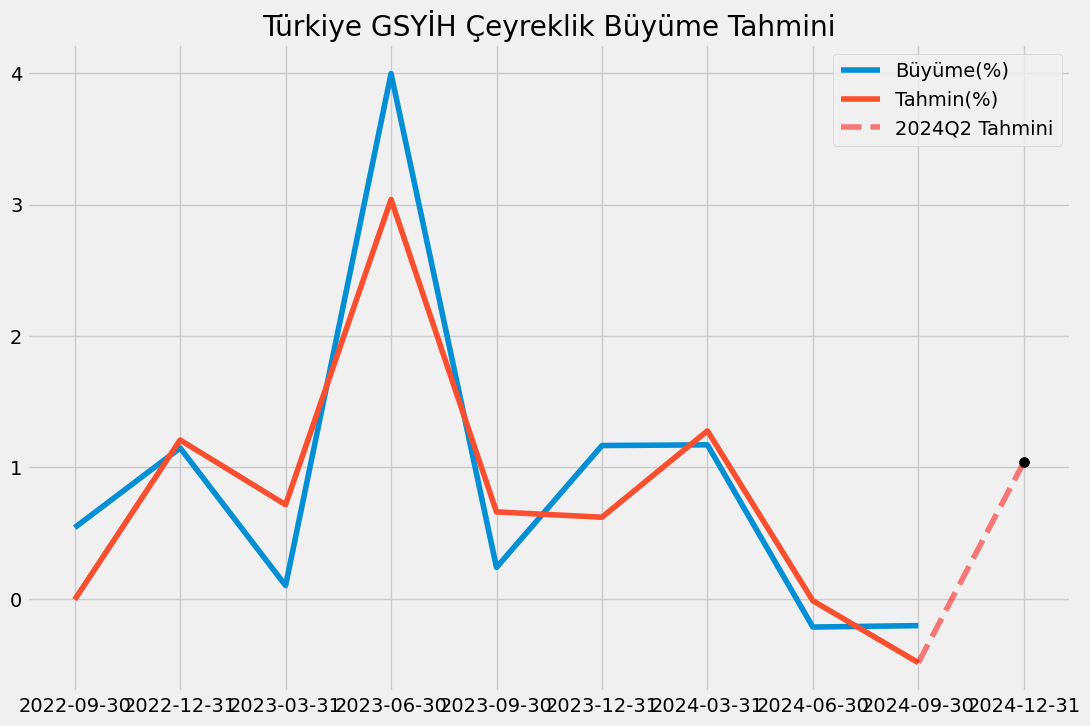

In [49]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler1["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler1["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler1["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler1.index[-1],y=tahminler1["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [52]:
study.best_params

{'learning_rate': 0.005016550871229136,
 'units1': 214,
 'batch_size': 10,
 'activation1': 'elu',
 'optimizer': 'adam',
 'rlrate': 0.25810037004859815}

In [53]:
selected_features=["KKO","Kart","Reel Güven","Sanayi","Tüketici Güven","Normal Sipariş"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=214,activation='elu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.25810037004859815)))
    model.add(Dense(units=214,activation='elu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.25810037004859815)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.005016550871229136)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=10,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler2=pd.DataFrame()
    tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler2["Tahmin"]=pred["Büyüme"]
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1]))
    print(pred.iloc[-1,0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1.1743217
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1.9210335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.4177768
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1.5784922
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1.3239585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1.4421198
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.4582953
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1.4686174
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.4405874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1.3718833
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1.4176139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━

In [54]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=214,activation='elu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.25810037004859815)))
model.add(Dense(units=214,activation='elu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.25810037004859815)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005016550871229136)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=10,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [55]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


,Büyüme
2022-09-30,0.193353
2022-12-31,1.821394
2023-03-31,1.073755
2023-06-30,3.613638
2023-09-30,0.683595
2023-12-31,1.013893
2024-03-31,1.930996
2024-06-30,0.089947
2024-09-30,-0.270667
2024-12-31,1.338749


In [56]:
tahminler2=pd.DataFrame()
tahminler2["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler2["Tahmin"]=pred["Büyüme"]
tahminler2

,Büyüme,Tahmin
2022-09-30,0.542207,0.193353
2022-12-31,1.148543,1.821394
2023-03-31,0.101158,1.073755
2023-06-30,3.998077,3.613638
2023-09-30,0.239144,0.683595
2023-12-31,1.166981,1.013893
2024-03-31,1.172372,1.930996
2024-06-30,-0.214586,0.089947
2024-09-30,-0.203679,-0.270667
2024-12-31,0.000000,1.338749


In [57]:
mean_squared_error(tahminler2["Büyüme"].iloc[:-1],tahminler2["Tahmin"].iloc[:-1])

0.28465322228667783

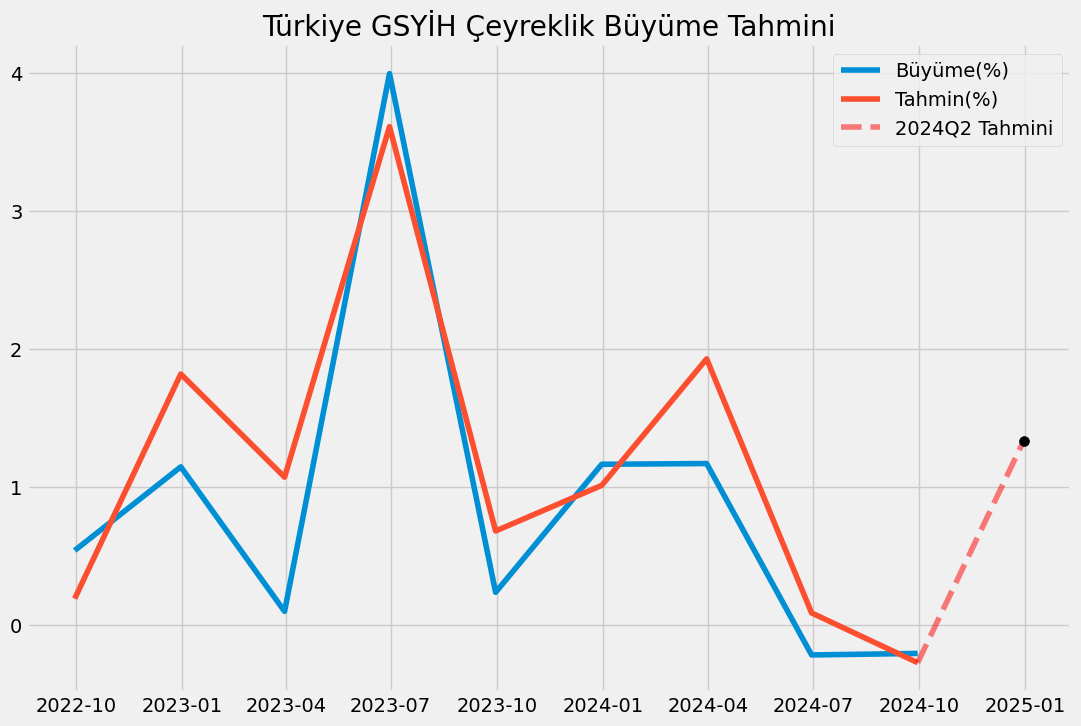

In [58]:
plt.figure(figsize=(12,8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")
plt.plot(tahminler2["Büyüme"][:-1],label="Büyüme(%)")
plt.plot(tahminler2["Tahmin"][:-1],label="Tahmin(%)")
plt.plot(tahminler2["Tahmin"].iloc[-2:],"--",label="2024Q2 Tahmini",color="red",alpha=0.5)
plt.scatter(x=tahminler2.index[-1],y=tahminler2["Tahmin"][-1],color="black",s=50,zorder=3)
plt.legend()

In [71]:
study.best_params

{'learning_rate': 0.02011056172974133,
 'units1': 51,
 'batch_size': 15,
 'activation1': 'tanh',
 'optimizer': 'adam',
 'rlrate': 0.12414180506048376}

In [57]:
selected_features=["KKO","İşsizlik","Kart","M3","Mevduat Faiz 3Ay","Sanayi","Tüketici Güven","ÜFE","USD/TL"]
X=scaled_data[selected_features]
y=scaled_data["Büyüme"]
X=np.array(X)
y=np.array(y).reshape(-1,1)
X=pd.DataFrame(X,columns=selected_features)
y=pd.DataFrame(y,columns=["Büyüme"])
X_train,X_test=X.iloc[:-10,:],X.iloc[-10:,:]
y_train,y_test=y[:-10],y[-10:]
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=42)
for i in range(20):
    keras.utils.set_random_seed(i)
    early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
    model = Sequential()   
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
    history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
    y_pred = model.predict(X_test)
    pred=scaler.inverse_transform(model.predict(np.array(X_test)))
    pred=pd.DataFrame(pred)
    pred.columns=["Büyüme"]
    pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
    tahminler3=pd.DataFrame()
    tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
    tahminler3["Tahmin"]=pred["Büyüme"]
    tahminler.append(pred.iloc[-1,0])
    hata.append(mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

In [58]:
keras.utils.set_random_seed(42)
early_stopping = EarlyStopping(monitor='val_loss', patience=0, restore_best_weights=True)
model = Sequential()   
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=111,activation='selu',input_dim=(X_train.shape[1]),kernel_regularizer=l2(0.16586327140504092)))
model.add(Dense(units=1))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.004411704049285289)
model.compile(optimizer=optimizer, loss='mse', metrics=['mean_squared_error'])
history=model.fit(X_train, y_train, epochs=1000, batch_size=31,callbacks=[early_stopping],verbose=0,validation_data=(X_val,y_val))
y_pred = model.predict(X_test)
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [59]:
predictions=pd.DataFrame()
predictions["Tahmin"]=tahminler
predictions["Hata"]=hata
predictions["Ağırlık"]=1/predictions["Hata"]
predictions

,Tahmin,Hata,Ağırlık
0,1.281049,0.392782,2.545941
1,1.280622,0.343332,2.912629
2,1.042212,0.551864,1.812039
3,1.227079,0.308510,3.241382
4,1.306313,0.338069,2.957976
5,1.533034,0.809815,1.234850
6,0.425325,0.385371,2.594900
7,1.331061,0.438170,2.282217
8,-0.060853,1.460934,0.684494
9,1.021024,0.507051,1.972188


In [60]:
predictions=predictions[predictions["Hata"]<0.5]

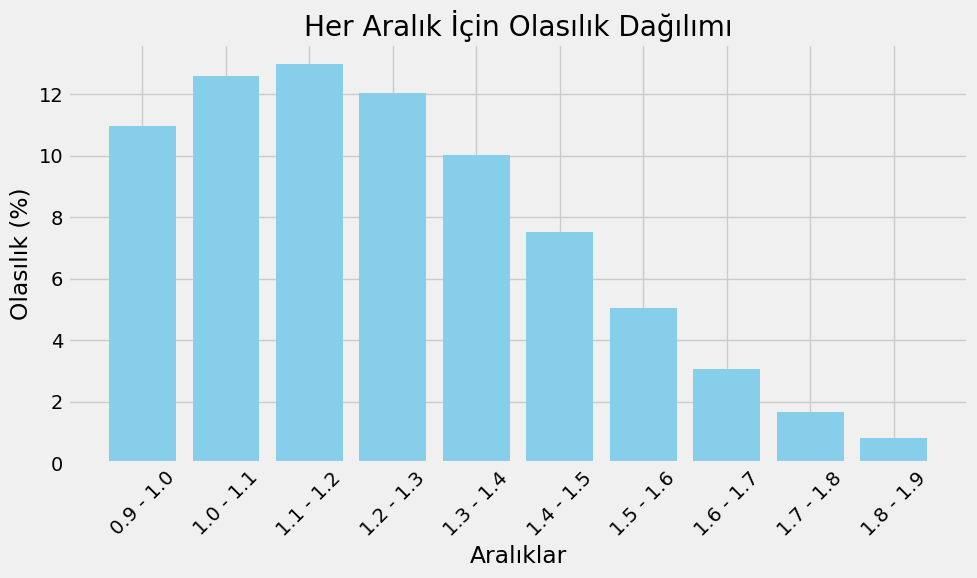

In [61]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

tahmin_degerleri = predictions["Tahmin"]

# Ortalama ve standart sapma hesapla
ortalama = np.mean(tahmin_degerleri)
standart_sapma = np.std(tahmin_degerleri)

# 1.7'den başlayıp her 0.1'lik aralık için olasılık hesaplama
baslangic = 0.9
bitis =  2

# 0.1'lik adımlarla aralıkları hesaplama
araliklar = np.arange(baslangic, bitis, 0.1)
olasliklar = []

for i in range(len(araliklar) - 1):
    alt = araliklar[i]
    ust = araliklar[i + 1]
    # Aralık için olasılığı hesapla
    olasilik = stats.norm.cdf(ust, loc=ortalama, scale=standart_sapma) - stats.norm.cdf(alt, loc=ortalama, scale=standart_sapma)
    olasliklar.append((alt, ust, olasilik))

# Bar grafik için verileri hazırlama
araliklar_labels = [f"{alt:.1f} - {ust:.1f}" for alt, ust, _ in olasliklar]
olasliklar_degerleri = [olasilik * 100 for _, _, olasilik in olasliklar]  # Olasılığı yüzdeye dönüştür

# Bar grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(araliklar_labels, olasliklar_degerleri, color='skyblue')

# Başlık ve etiketler
plt.title('Her Aralık İçin Olasılık Dağılımı')
plt.xlabel('Aralıklar')
plt.ylabel('Olasılık (%)')
plt.xticks(rotation=45)  # Etiketlerin daha okunabilir olması için döndürme

# Grafiği gösterme
plt.tight_layout()
plt.show()


In [62]:
tahmin_degerleri=predictions["Tahmin"]
ortalama = np.sum(predictions["Tahmin"]*predictions["Ağırlık"])/(np.sum(predictions["Ağırlık"]))
standart_sapma = np.std(tahmin_degerleri)

for esik in [0.85]:
    z = stats.norm.ppf(esik) 
    if esik==0.995:
        guven=99
    elif esik==0.975:
        guven=95
    elif esik==0.95:
        guven=90
    elif esik==0.85:
        guven=70


    alt_limit = ortalama - z * standart_sapma
    ust_limit = ortalama + z * standart_sapma

    print(f"%{guven} olasılıkla tahminler {alt_limit:.2f} ile {ust_limit:.2f} arasındadır.")

%70 olasılıkla tahminler 0.81 ile 1.44 arasındadır.


In [63]:
pred=scaler.inverse_transform(model.predict(np.array(X_test)))
pred=pd.DataFrame(pred)
pred.columns=["Büyüme"]
pred=pred.set_index(pd.date_range(start="2022-09-30",periods=len(pred),freq="Q"))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


,Büyüme
2022-09-30,-0.368085
2022-12-31,2.212365
2023-03-31,0.456747
2023-06-30,4.974675
2023-09-30,0.607324
2023-12-31,0.500154
2024-03-31,3.003074
2024-06-30,-0.928555
2024-09-30,-0.461089
2024-12-31,1.037119


In [64]:
tahminler3=pd.DataFrame()
tahminler3["Büyüme"]=data["Büyüme"].iloc[-10:]
tahminler3["Tahmin"]=pred["Büyüme"]
tahminler3

,Büyüme,Tahmin
2022-09-30,0.542207,-0.368085
2022-12-31,1.148543,2.212365
2023-03-31,0.101158,0.456747
2023-06-30,3.998077,4.974675
2023-09-30,0.239144,0.607324
2023-12-31,1.166981,0.500154
2024-03-31,1.172372,3.003074
2024-06-30,-0.214586,-0.928555
2024-09-30,-0.203679,-0.461089
2024-12-31,0.000000,1.037119


In [65]:
mean_squared_error(tahminler3["Büyüme"].iloc[:-1],tahminler3["Tahmin"].iloc[:-1])

0.8386925454195304

In [66]:

tahminler3.index=pd.to_datetime(tahminler3.index)
tahminler2.index=pd.to_datetime(tahminler2.index)
tahminler1.index=pd.to_datetime(tahminler1.index)

In [67]:
sonuç=pd.DataFrame()
sonuç=pd.concat([tahminler1["Tahmin"],tahminler2["Tahmin"],tahminler3["Tahmin"]],axis=1)
sonuç["Ortalama"]=sonuç.mean(axis=1)
sonuç["Büyüme"]=tahminler1["Büyüme"]
sonuç.index=pd.to_datetime(sonuç.index)
sonuç

,Tahmin,Tahmin,Tahmin,Ortalama,Büyüme
2022-09-30,-0.465069,-0.199519,-0.368085,-0.344224,0.542207
2022-12-31,1.896906,1.893178,2.212365,2.000816,1.148543
2023-03-31,0.538591,0.325205,0.456747,0.440181,0.101158
2023-06-30,4.420163,4.324986,4.974675,4.573274,3.998077
2023-09-30,0.430818,0.702386,0.607324,0.580176,0.239144
2023-12-31,0.373997,0.390169,0.500154,0.421440,1.166981
2024-03-31,2.331756,2.265019,3.003074,2.533283,1.172372
2024-06-30,-0.443994,-0.883470,-0.928555,-0.752006,-0.214586
2024-09-30,-0.353358,-0.526753,-0.461089,-0.447067,-0.203679
2024-12-31,1.336041,0.702423,1.037119,1.025194,0.000000


In [57]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cari.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = sonuç["Ortalama"].iloc[-1]

try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-10 tarihli tahmin başarıyla eklendi.


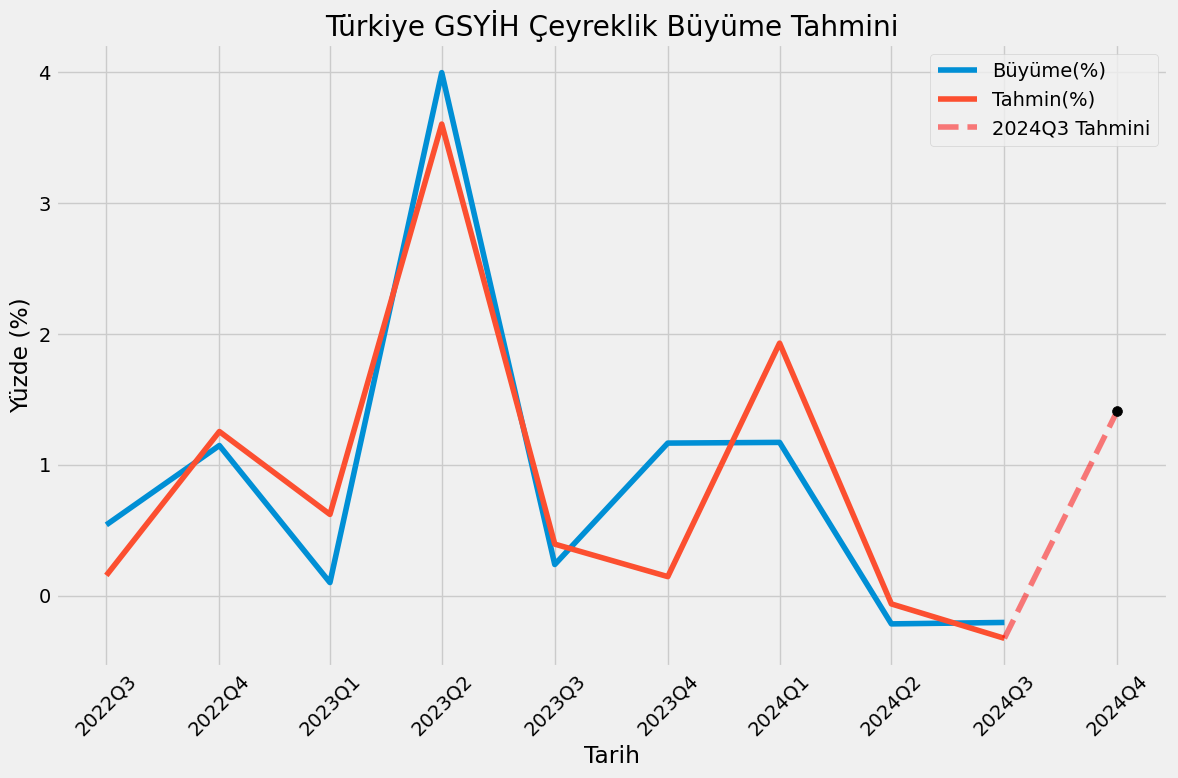

In [58]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.title("Türkiye GSYİH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.show()


In [68]:
yıllık=pd.read_excel("gayrisafi yurtici hasila harcama yontemiyle mevsim ve takvim etkisinden arindirilmis zincirlenmis ha.xls")
yıllık=yıllık.iloc[6:34,14:18]


veri=[]
for i in range(len(yıllık)):
   veri.append(yıllık.iloc[i,:].values)


veri=np.array(veri)
veri=veri.reshape(1,-1)
veri=pd.DataFrame(veri.T)
veri.columns=["Büyüme"]
veri=veri.dropna()
veri=veri.set_index(pd.date_range(start="1998-03-31",freq="Q",periods=len(veri)))

In [69]:


veri.loc[pd.to_datetime("2024-12-31")]=veri["Büyüme"].iloc[-1]*(1+(sonuç["Ortalama"].iloc[-1]/100))


In [70]:
veri["Tahmin"]=0
veri["Tahmin"].loc[sonuç.index[0]]=veri.loc["2022-06-30","Büyüme"]*(1+(sonuç["Ortalama"].iloc[0]/100))
for i in range(1,len(sonuç)):
    veri["Tahmin"].loc[sonuç.index[i]]=veri.loc[sonuç.index[i-1],"Büyüme"]*(1+(sonuç["Ortalama"].iloc[i]/100))

veri["Üst"]=0
veri["Üst"].iloc[-1]=(1+(df["Üst"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

veri["Alt"]=0
veri["Alt"].iloc[-1]=(1+(df["Alt"].iloc[-1]/100))*veri.loc[sonuç.index[-2],"Büyüme"]

NameError: name 'df' is not defined

In [62]:
veri=veri[veri["Tahmin"]!=0]
for i in range(len(veri)):
    veri["Tahmin"].iloc[i]=((veri["Tahmin"].iloc[i]/veri["Büyüme"].iloc[i-4])-1)*100


In [63]:
veri["Üst"]=((veri["Üst"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Alt"]=((veri["Alt"]/veri["Büyüme"].iloc[-5])-1)*100
veri["Büyüme"]=veri["Büyüme"].pct_change(4)*100



In [64]:
veri.to_csv("yıllık.csv")

In [65]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/cariyıl.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = veri["Büyüme"].iloc[-1]
ust_limit=veri["Üst"].iloc[-1]
alt_limit=veri["Alt"].iloc[-1]
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-10 tarihli tahmin başarıyla eklendi.


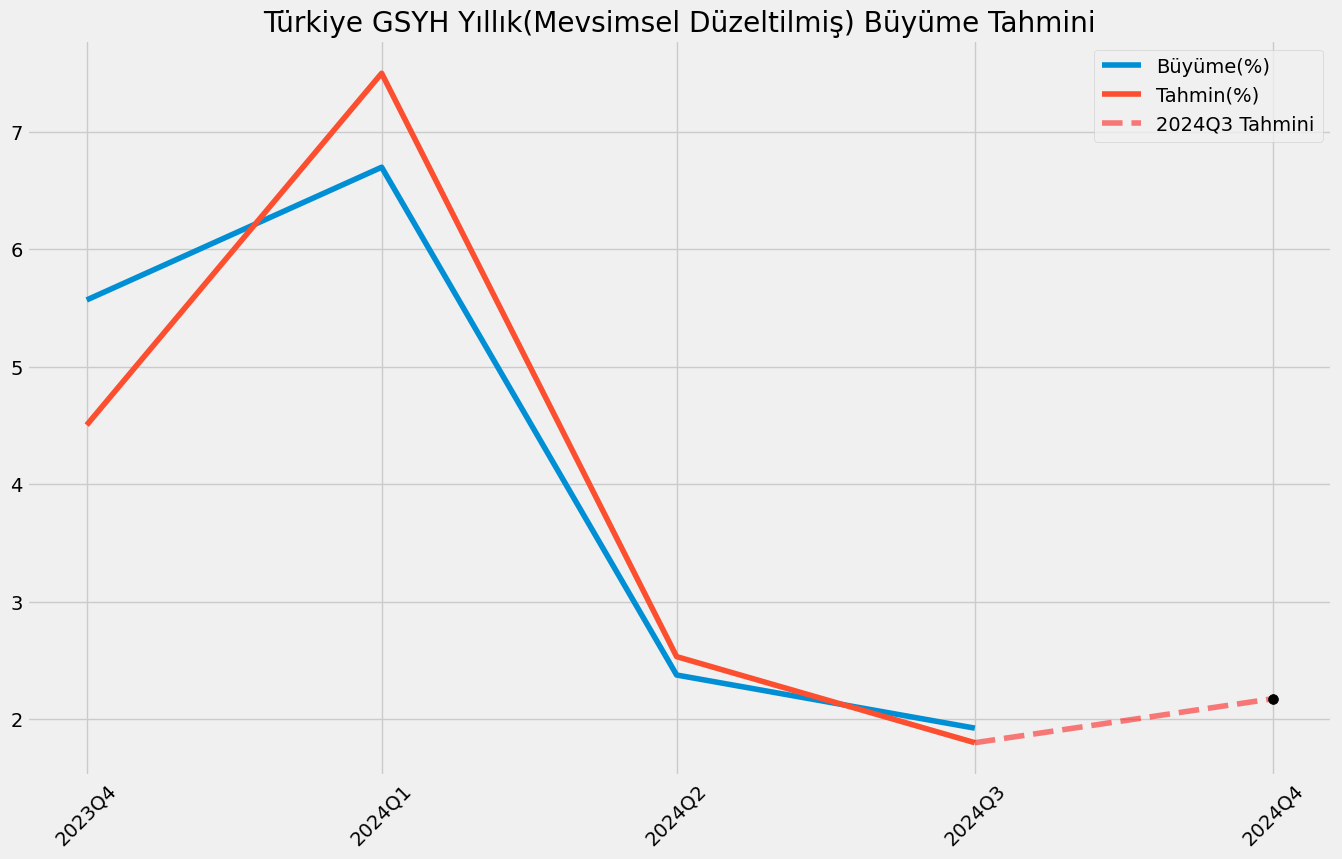

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-5:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-5:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q3 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-5:]]
plt.xticks(ticks=veri.index[-5:], labels=tarihler, rotation=45)
plt.grid(True)





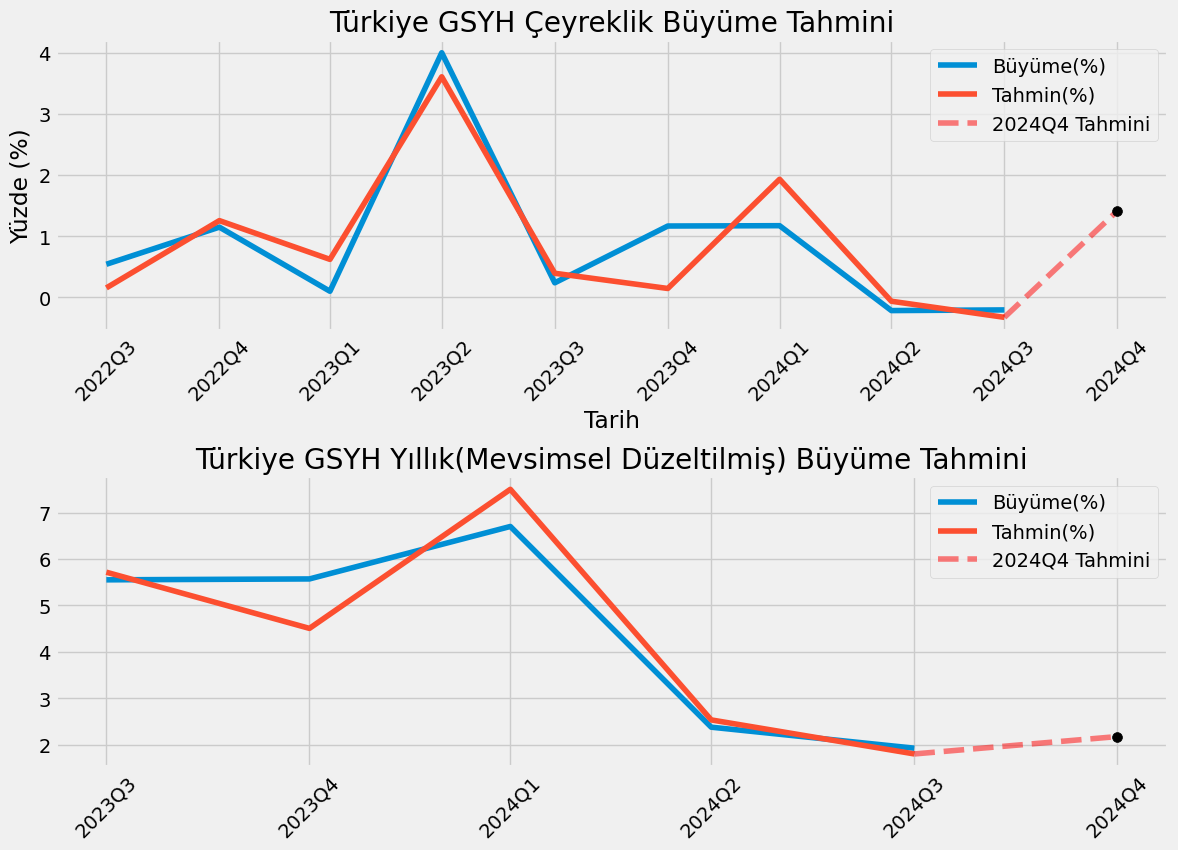

In [67]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"

plt.figure(figsize=(12, 8))
plt.subplot(2,1,1)
plt.title("Türkiye GSYH Çeyreklik Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(sonuç["Büyüme"][:-1], label="Büyüme(%)")
plt.plot(sonuç["Ortalama"][:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(sonuç["Ortalama"].iloc[-2:], "--", label="2024Q4 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=sonuç.index[-1], y=sonuç["Ortalama"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in sonuç.index]
plt.xticks(ticks=sonuç.index, labels=tarihler, rotation=45)
plt.xlabel('Tarih')
plt.ylabel('Yüzde (%)')
plt.grid(True)


plt.tight_layout()
plt.subplot(2,1,2)

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def tarih_ceyrek(tarih):
    yil = tarih.year
    ay = tarih.month
    if ay <= 3:
        return f"{yil}Q1"
    elif ay <= 6:
        return f"{yil}Q2"
    elif ay <= 9:
        return f"{yil}Q3"
    else:
        return f"{yil}Q4"



plt.title("Türkiye GSYH Yıllık(Mevsimsel Düzeltilmiş) Büyüme Tahmini")

# Tahminlerin çizimi
plt.plot(veri["Büyüme"][-6:-1], label="Büyüme(%)")
plt.plot(veri["Tahmin"][-6:-1], label="Tahmin(%)")

# 2024Q1 Tahmini çizimi
plt.plot(veri["Tahmin"].iloc[-2:], "--", label="2024Q4 Tahmini", color="red", alpha=0.5)

# Son tahmin noktasının gösterimi
plt.scatter(x=veri.index[-1], y=veri["Tahmin"][-1], color="black", s=50, zorder=3)

# Eksen etiketlerinin ve gösterge için konfigürasyon
plt.legend()
# Çeyreklik gösterimi için eksen etiketlerinin ve formatın ayarlanması
tarihler = [tarih_ceyrek(t) for t in veri.index[-6:]]
plt.xticks(ticks=veri.index[-6:], labels=tarihler, rotation=45)
plt.subplots_adjust(hspace=0.5)
plt.grid(True)





In [68]:
import os
import subprocess
from datetime import datetime
import time
import git
from git import Repo
import os
repo_dir = ".git"  # Buraya Git deposunun yolunu girin

def git_add_commit_push():
    try:
        # Repo nesnesini oluştur
        repo = Repo(repo_dir)
        assert not repo.bare

        # Git add: tüm değişiklikleri ekliyoruz
        repo.git.add(A=True)  # A=True ile tüm dosyalar eklenir

        # Commit işlemi
        commit_message = "update"
        repo.index.commit(commit_message)
        print(f"Commit işlemi başarılı: {commit_message}")

        # Push işlemi
        origin = repo.remote(name='origin')
        origin.push()
        print("Push işlemi başarılı.")

    except Exception as e:
        print(f"Git işlemi sırasında hata oluştu: {e}")


git_add_commit_push()

Commit işlemi başarılı: update
Push işlemi başarılı.


In [72]:
günlük=pd.read_csv("cari.csv",index_col=0)
yıllık=pd.read_csv("cariyıl.csv",index_col=0)
yıllık

,Tahmin,Üst,Alt
2024-12-09,1.466983,1.639763,1.329052
2024-12-10,1.487133,1.664766,1.345328
2024-12-11,1.436758,1.602258,1.304639
2024-12-12,1.446833,1.614760,1.312777
2024-12-13,1.477058,1.652264,1.337190
2024-12-16,1.456908,1.627261,1.320914
2024-12-17,1.487133,1.664766,1.345328
2024-12-18,1.486125,1.663516,1.344514
2024-12-19,1.426683,1.589756,1.296501
2024-12-20,1.507283,1.689769,1.361603


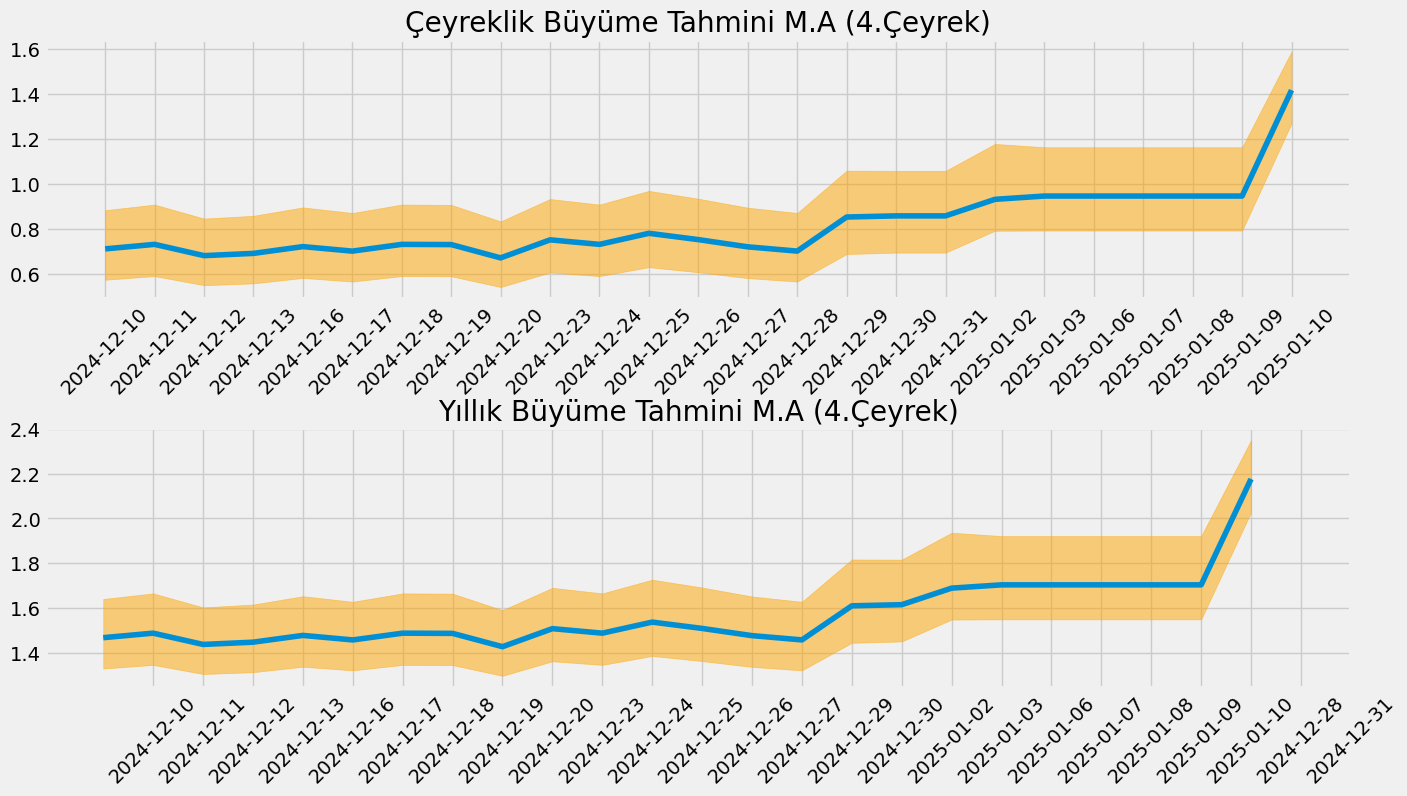

In [82]:

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.title("Çeyreklik Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(günlük["Tahmin"],label="Ortalama")
plt.fill_between(günlük.index,günlük["Üst"],günlük["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplot(2,1,2)
plt.title("Yıllık Büyüme Tahmini M.A (4.Çeyrek)")
plt.plot(yıllık["Tahmin"],label="Ortalama")
plt.fill_between(yıllık.index,yıllık["Üst"],yıllık["Alt"],alpha=0.5,color="orange")
plt.xticks(günlük.index,rotation=45)

plt.subplots_adjust(hspace=0.5)


In [108]:



ham=pd.read_excel("veri3.xlsx",index_col=0)
arındırılmış=pd.read_excel("veri2.xlsx",index_col=0)



arındırılmış.loc["2024-12-31"]=((günlük["Tahmin"].iloc[i]/100)+1)*arındırılmış.loc["2024-09-30"]

ham_yıllık=(((arındırılmış.loc["2024-12-31"]*1.071)/ham.loc["2023-12-31"])-1)*100
ham_yıllık=ham_yıllık.values[0]
ham_yıllık=np.round(ham_yıllık,2)


arındırılmış.loc["2024-12-31"]=((günlük["Üst"].iloc[i]/100)+1)*arındırılmış.loc["2024-09-30"]

ham_yıllık_üst=(((arındırılmış.loc["2024-12-31"]*1.071)/ham.loc["2023-12-31"])-1)*100
ham_yıllık_üst=ham_yıllık_üst.values[0]
ham_yıllık_üst=np.round(ham_yıllık_üst,2)


arındırılmış.loc["2024-12-31"]=((günlük["Alt"].iloc[i]/100)+1)*arındırılmış.loc["2024-09-30"]

ham_yıllık_alt=(((arındırılmış.loc["2024-12-31"]*1.071)/ham.loc["2023-12-31"])-1)*100
ham_yıllık_alt=ham_yıllık_alt.values[0]
ham_yıllık_alt=np.round(ham_yıllık_alt,2)

In [112]:
import pandas as pd
from datetime import datetime


csv_file = "C:/Users/Bora/Documents/GitHub/BuyumeTahmin/ham.csv"
df = pd.read_csv(csv_file, index_col=0)

# Bugünün tarihini "dd-mm-yyyy" formatında al
today_date = datetime.today().strftime("%Y-%m-%d")

# Yeni tahmin değeri
new_tahmin = ham_yıllık
ust_limit=ham_yıllık_üst
alt_limit=ham_yıllık_alt
try:
    df.loc[today_date] = [new_tahmin, ust_limit, alt_limit]
except:
    pass

df.to_csv(csv_file)

print(f"{today_date} tarihli tahmin başarıyla eklendi.")


2025-01-10 tarihli tahmin başarıyla eklendi.
